# Data Mining final Project

For the project you are going to work in groups of 2.

## Aim
The aim of this project is to predict molecular properties.  You are going to work with molecular data and you have  to predict 4 molecular properties,  the Octanol-water partition coefficient (logP),  the number of rotatable bonds (RBN),  the molecular weight (MW) and the number of the rings (RN).

## Data

You are going to work using a subset the QM9 dataset.  The original QM9 dataset [Ramakrishnan et al.,2014)](ttps://www.nature.com/articles/sdata201422), contains $134k $ stable small organic molecules with up to 9 heavy atoms.


The data  consists of the following files:
1. QM9.txt
2. properties_QM9.npz

In **QM9.txt** the molecules are represented as SMILES  (Simplified molecular-input line-entry system).  SMILES strings proposed by Weininger (1988),  are non-unique representations which encode the molecular graph into a sequence of ASCII characters using a depth-first graph traversal.

For this project we ask you to predict 4 molecular properties,  the Octanol-water partition coefficient (logP),  the  number of rotatable bonds (RBN),  the molecular weight (MW) and the number of the rings (RN).  

- logP: represents a measure of the tendency of a compound to move from the aqueous phase into lipids
- Number of rotatable bonds (RBN):  the number of bonds which allow free rotation around themselves 
- Molecular weight (MW): the weight of a molecule based on the atomic masses of all atoms in the molecule
- Number of the rings (RN): the number of connected sets of atoms and bonds in which every atom and bond is a member of a cycle

**properties\_QM9.npz** file contains these 4 properties for the QM9.txt data.  


## Model
Before starting your analysis it is very important to understand the data and the objective of this project.

You are free to chose the representation of the data that you are going to use. If you want to work with one-hot-encoding data (see project.pdf for details) you can find the code to convert a single smile string to a one-hot encoding in `smile_to_hot()` function at `utils.py`.
 You can even use as input data different properties and descriptors (number of bonds,  number of atoms,  number of C, number of O e.t.c. )  that you can extract from your data  manually or using RDKit.  (The properties that we mention are random examples,  there are much more properties and descriptors for the molecules and you have to think what it makes sense for you to use). 

You are free to try different approaches and models,  you can use ready libraries for your algorithm. The main focus is to see the model you have come up but also the other approaches that you tried. You have to understand deeply all the algorithms that you have tried. 



Using load\_data() function in utils.py split the data and the corresponding properties  into train and test.  Use **cross-validation** to select the best model based on **statistical significant test**.  Only for the best model you will use the test data (of course you have to include in your report and present all the models that you have tried).   **It is mandatory to use three or more different algorithms in addition to a baseline**. 

(The baseline is the naive baseline algorithm,  providing context on just how good a given method actually is.)


The final model we would expect is a model that can work on universal data,  which means it can give a reasonable prediction on different molecular datasets.
 


## Report
You have to submit a formal report .  Your report has to include the approaches that you followed and main results not only for your final model but for all the models you have tried. We want a full picture of what exactly you have done and how. You should also discuss the different performances you have with your methods and explain why these work or not. What is important is to show us that you have a good understanding of the problem and of how to model it, what are the problems you encountered and how you solved them.


Note that this is an open project, you can try many different approaches as long as they make sense to get the best performance (creative ideas are always welcome).

## Final submission
For your final submission you have to submit on Moodle a folder named using your names (ex. NAME1_NAME2_DM_project) which should include your code (all the scripts), the dataset and your report (the report should also be saved using your names: NAME1_NAME2_DM_project.pdf).  If the size of your submission is big you can upload your submission on [SWITCH drive](https://www.switch.ch) and put on Moodle the shared link. 

## Installation Instructions
Below you will find some instructions about how to install some packages that required for the project through Conda.

[Conda](https://docs.conda.io/en/latest/) is a package manager that works on all the popular operating systems. If you do not already have it installed (e.g. through Anaconda) you can install it via Miniconda by following the instructions [here](https://docs.conda.io/en/latest/miniconda.html) -- it doesn't matter which version of Python you pick at this stage.  We can then setup the particular environment  using the [Conda yml file](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-from-an-environment-yml-file) I put in the folder of the project.


Assuming you have Conda installed,  install the environment by:

1. `conda env create -f DM_project_env.yml`
2. `conda activate DM_project`
3. And then finally check it worked correctly by running \$ `conda env list`

To **activate your enviroment** type: `$ conda activate DM_project`
and to deactivete it you should type `$ conda deactivate`




In [1]:
conda env create -f DM_project_env.yml


Note: you may need to restart the kernel to use updated packages.



CondaValueError: prefix already exists: C:\Users\CrimsonX\Anaconda3\envs\DM_project



In [2]:
conda activate DM_project


Note: you may need to restart the kernel to use updated packages.


## Smiles - RDKit

Now we will see some examples how we can use RDKit to visualize the molecules and how we can extract different descriptors

In [3]:
import numpy as np

In [4]:
# import the parts of RDKit that we need
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit import DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor, rdMolDescriptors


from rdkit.Chem.Draw import IPythonConsole


import time
rdDepictor.SetPreferCoordGen(True)
print(rdkit.__version__)


2020.03.1


If get an error runing the previous cell 
- first check that you have installed correctly your enviroment (check if you can see it if you type in your termilal `$ conda env list`). 
- If the enviroment is installed correctly make sure that you have activated it (`$ conda activate DM_project`) before you opened the jupyter notebook.


##  Reading in SMILES strings

SMILES (Simplified molecular-input line-entry system) proposed by Weininger (1988) is a popular method to represent molecules as ASCII strings. The string is created by printing out the nodes found on a traversal of the molecular graph. The idea behind is to use simple line notations for chemical formulas that are based on some rules.


Atoms of chemical elements are represented by chemical symbols in capital letter, hydrogen is usually ignored. Single bonds are not displayed; for double, triple and quadruple bonds we shall use '=', '#', '$' respectively. Atoms that are bonded must stand nearby. Ring structures are written by breaking each ring at an arbitrary point (although some choices will lead to a more legible SMILES than others) to make a 'straight non-ring' structure (as if it wasn't a ring) and adding numerical ring closure labels to show connectivity between non-adjacent atoms. Aromacity is commonly illustrated by writing the constituent B, C, N, O, P and S atoms in lower-case forms b, c, n, o, p and s, respectively.




## RDKit


RDKit is a collection of cheminformatics and machine learning tools written in C++ and Python. It allows to work with many representations of chemical data and has a power to extract almost each chemical descriptor from the data you have. 

You can learn more about how to use RDKit, in the RDKit [documentation](http://www.rdkit.org/docs/index.html).

### Using RDKit

Let's start by defining a string variable containing the SMILES representation of the paracetemol (i.e. acetaminophen) molecule, a popular painkiller and reading it into RDKit.


### Visualization of molecules

In order to visualize the the SMILES we have to convert them to molecules. This happened running `Chem.MolFromSmiles`.



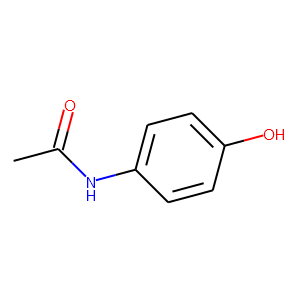

In [5]:
paracetemol_str = 'CC(=O)Nc1ccc(O)cc1'

# convert smile to mol
paracetemol_mol = Chem.MolFromSmiles(paracetemol_str)

# visualize mol
Draw.MolToImage(paracetemol_mol)

Once we have converted the SMILES to a RDKit `Mol` object (which happened when running `Chem.MolFromSmiles`) we can manipulate it in different ways. For example, we can iterate through the atoms or bonds:

In [6]:
# Iterate through the atoms. Print their symbol,  atomic number, and number of Hydrogens
for atm in paracetemol_mol.GetAtoms():
    print(f"Atom element: {atm.GetSymbol()}, atomic number: {atm.GetAtomicNum()}, number of hydrogens {atm.GetTotalNumHs()}")

    
print("\n\n")


# Iterate through the bonds
for bnd in paracetemol_mol.GetBonds():
    print(f"Bond from {bnd.GetBeginAtomIdx()} to {bnd.GetEndAtomIdx()} and is of type {bnd.GetBondType()}.")


Atom element: C, atomic number: 6, number of hydrogens 3
Atom element: C, atomic number: 6, number of hydrogens 0
Atom element: O, atomic number: 8, number of hydrogens 0
Atom element: N, atomic number: 7, number of hydrogens 1
Atom element: C, atomic number: 6, number of hydrogens 0
Atom element: C, atomic number: 6, number of hydrogens 1
Atom element: C, atomic number: 6, number of hydrogens 1
Atom element: C, atomic number: 6, number of hydrogens 0
Atom element: O, atomic number: 8, number of hydrogens 1
Atom element: C, atomic number: 6, number of hydrogens 1
Atom element: C, atomic number: 6, number of hydrogens 1



Bond from 0 to 1 and is of type SINGLE.
Bond from 1 to 2 and is of type DOUBLE.
Bond from 1 to 3 and is of type SINGLE.
Bond from 3 to 4 and is of type SINGLE.
Bond from 4 to 5 and is of type AROMATIC.
Bond from 5 to 6 and is of type AROMATIC.
Bond from 6 to 7 and is of type AROMATIC.
Bond from 7 to 8 and is of type SINGLE.
Bond from 7 to 9 and is of type AROMATIC.
Bo

Note that when we iterated through the atoms we also printed the number of hydrogen atoms attached. You may have spotted that these hydrogen atoms were not included in the original SMILES string. In general we ignore the hydrogen atoms (they are treated implicitly) but we can include them in SMILES strings if we wanted:

In [7]:
print(Chem.MolToSmiles(paracetemol_mol, allHsExplicit=True))

[CH3][C](=[O])[NH][c]1[cH][cH][c]([OH])[cH][cH]1


### Numbers of atoms of molecule

The size of a molecule can be approximated by a number of atoms in it. Let's extract corresponding values from MOL. RDkit provides GetNumAtoms() 

Number of total atoms in paracetamol : 20
Number of atoms in paracetamol (excluding H): 11


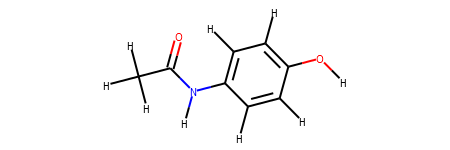

In [8]:
# AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored)
# GetNumAtoms() method returns a general nubmer of all atoms in a molecule including H


paracetemol_mol_with_H = Chem.AddHs(paracetemol_mol)

print('Number of total atoms in paracetamol :', paracetemol_mol_with_H.GetNumAtoms())
print('Number of atoms in paracetamol (excluding H):', paracetemol_mol.GetNumAtoms())

paracetemol_mol_with_H

### Descriptors
A number of general molecular descriptors that can also be used to featurize a molecule are provided by `rdkit.Chem.Descriptors` and `rdkit.Chem.rdMolDescriptors`. Bellow we can see some examples. More examples and a detailed descripton you can find in **RDKit** documantation.



In [9]:
# Descriptors.HeavyAtomCount returns a nubmer of all atoms in a molecule with molecular weight > 1
# Descriptors.HeavyAtomMolWt the average molecular weight of the molecule ignoring hydrogens
# Descriptors.MolLogP returns the Octanol-water partition coefficient
# Descriptors.qed returns the drug-likeness 
# Descriptors.MolW returns the Molecular weight
# Descriptors.NumRotatableBonds returns the number of rotatable bond
# ...

desc_HeavyAtomCount = Descriptors.HeavyAtomCount(paracetemol_mol)
desc_HeavyAtomMolWt = Descriptors.HeavyAtomMolWt(paracetemol_mol)
desc_MolLogP = Descriptors.MolLogP(paracetemol_mol)
desc_qed = Descriptors.qed(paracetemol_mol)
desc_MolWt = Descriptors.MolWt(paracetemol_mol)
desc_NumRotatableBonds = Descriptors.NumRotatableBonds(paracetemol_mol)

print('Number of heavy atoms in paracetamol:', desc_HeavyAtomCount)
print('Average molecular weight ignoring hydrogens:', desc_HeavyAtomMolWt)

print('logP in paracetamol:', desc_MolLogP)
print('drug-likeness:', desc_qed)
print('Molecular weight:', desc_MolWt)


# rdMolDescriptors.CalcNumRings returns the number of rings for a molecule
# rdMolDescriptors.CalcNumHBD returns the number of H-bond donors for a molecule
# rdMolDescriptors.CalcNumHBA returns the number of H-bond acceptors for a molecule
# ...

num_rings = rdMolDescriptors.CalcNumRings(paracetemol_mol)
num_H_donors = rdMolDescriptors.CalcNumHBD(paracetemol_mol)
num_H_acceptors = rdMolDescriptors.CalcNumHBA(paracetemol_mol)

print('Number of ring:', num_rings)
print('Number of H-bond donors:', num_H_donors)
print('Number of H-bond acceptors:', num_H_acceptors)



Number of heavy atoms in paracetamol: 11
Average molecular weight ignoring hydrogens: 142.093
logP in paracetamol: 1.3505999999999998
drug-likeness: 0.5950261967780849
Molecular weight: 151.165
Number of ring: 1
Number of H-bond donors: 2
Number of H-bond acceptors: 2


## Defining and viewing a set of example molecules


In [10]:
naphthalene = Chem.MolFromSmiles('c12ccccc1cccc2')
benzoxazole = Chem.MolFromSmiles('n1c2ccccc2oc1')
indane = Chem.MolFromSmiles('c1ccc2c(c1)CCC2')
skatole = Chem.MolFromSmiles('CC1=CNC2=CC=CC=C12')
benzene = Chem.MolFromSmiles('c1ccccc1')
quinoline = Chem.MolFromSmiles('n1cccc2ccccc12')

my_molecules = [naphthalene, 
                benzoxazole,
                indane,
                skatole,
                benzene,
                quinoline,
               ]

It's easy to get a look at the structure of these molecules.



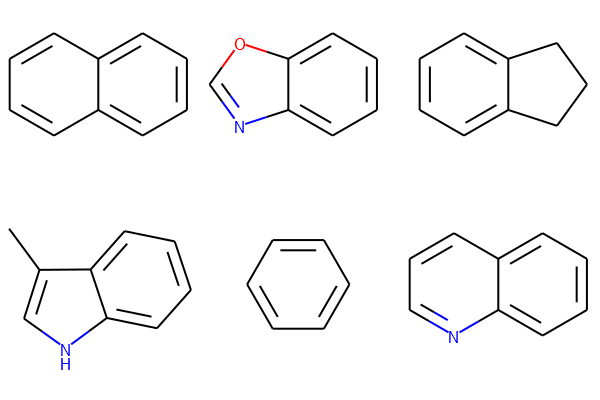

In [11]:
Draw.MolsToGridImage(my_molecules)

## Importing QM9 dataset and properties

In [12]:
from utils import get_smiles_encodings, load_data, smile_to_hot

In [13]:
file_smiles = 'dataset/QM9.txt'

# get smiles, alphabet and length of largest molecule in SMILES from the dataset
smiles, alphabet, largest_molecule_len = get_smiles_encodings(file_smiles)

In [14]:
print('QM9 dataset alphabet:', alphabet)
print('length of largest molecule:',largest_molecule_len)
print('some smiles:',smiles[2443:2449])

QM9 dataset alphabet: ['5', 'C', '(', '=', '#', '4', ')', '3', 'F', 'N', '1', '2', 'O', ' ']
length of largest molecule: 22
some smiles: ['N=C1OC2CC1C2' 'O=C1CC2CC1C2' 'O=C1CC2CC1O2' 'O=C1CN2CC1C2'
 'O=C1NC2CC1C2' 'O=C1OC2CC1C2']


In [15]:
file_properties = './dataset/properties_QM9.npz'

# load the properties: logP, RBN, MW, RN
properties = np.load(file_properties)['properties'].astype(np.float32)

In [16]:
properties

array([[  0.6361,   0.    ,  16.043 ,   0.    ],
       [  0.162 ,   0.    ,  17.031 ,   0.    ],
       [ -0.8247,   0.    ,  18.015 ,   0.    ],
       ...,
       [ -0.8808,   0.    , 120.155 ,   8.    ],
       [  0.3187,   0.    , 119.167 ,   8.    ],
       [ -0.55  ,   0.    , 121.139 ,   8.    ]], dtype=float32)

In [17]:
# Split data to train and test

X_train, X_test, y_train, y_test = load_data(smiles, properties)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
# largest_molecule_len

X_train shape: (92428,)
X_test shape: (39612,)
y_train shape: (92428, 4)
y_test shape: (39612, 4)


In [18]:
X_train[800]

'CCC(=NO)C#C'

In [19]:
X_test

array(['OC1COC(=O)CC1O', 'CC1CCC(=O)CC=C1', 'CC1CCC(=O)NC=C1', ...,
       'C1N2C3C4C5C2C13CN45', 'C1N2C3C4C5CC13C2C45',
       'C1N2C3C4C5OC13C2C45'], dtype=object)

In [20]:
# Convert a single smile string to a one-hot encoding
idx = 6362
integer_encoded, onehot_smile = smile_to_hot(X_train[idx], largest_molecule_len, alphabet)
onehot_smile

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0,

smile string: CC1CC(C)(O1)C#N
one-hot encoded smile: [[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


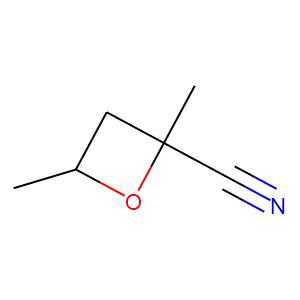

In [21]:
print('smile string:', X_train[idx])
print('one-hot encoded smile:', onehot_smile)
mol = Chem.MolFromSmiles(X_train[idx])
Draw.MolToImage(mol)

In [22]:
import csv

def feature_extract(molecule_string):
    
    features=[]
    
    f = open('feature_file.csv', 'a', newline ='')
    paracetemol_str = molecule_string

    # convert smile to mol
    paracetemol_mol = Chem.MolFromSmiles(paracetemol_str)

    # Features
    desc_HeavyAtomCount = Descriptors.HeavyAtomCount(paracetemol_mol)
    features.append(desc_HeavyAtomCount)
    # print(desc_HeavyAtomCount) 

    desc_HeavyAtomMolWt = Descriptors.HeavyAtomMolWt(paracetemol_mol)
    features.append(desc_HeavyAtomMolWt)
    # print(desc_HeavyAtomMolWt)

#     desc_MolLogP = Descriptors.MolLogP(paracetemol_mol)
#     features.append(desc_MolLogP)
#     # print(desc_MolLogP)

    desc_qed = Descriptors.qed(paracetemol_mol)
    features.append(desc_qed)
    # print(desc_qed)


    desc_MolWt = Descriptors.MolWt(paracetemol_mol)
    features.append(desc_MolWt)
    # print(desc_MolWt)

    # desc_NumRotatableBonds = Descriptors.NumRotatableBonds(paracetemol_mol)
    #features.append(desc_NumRotatableBonds)
    # print(desc_NumRotatableBonds)
    
    # The number of valence electrons the molecule has
    num_valence_e= Descriptors.NumValenceElectrons(mol)
    features.append(num_valence_e)
    # print(num_valence_e)

    # num_rings = rdMolDescriptors.CalcNumRings(paracetemol_mol)
    # features.append(num_rings)
    # print(num_rings)

    num_H_donors = rdMolDescriptors.CalcNumHBD(paracetemol_mol)
    features.append(num_H_donors)
    # print(num_H_donors)

    num_H_acceptors = rdMolDescriptors.CalcNumHBA(paracetemol_mol)
    features.append(num_H_acceptors)
    # print(num_H_acceptors)
    
    # print(features)

    # write to csv
    writer = csv.writer(f)
    # write a row to the csv file
    writer.writerow(features)

    features = []
    f.close()
    


    


In [49]:
import csv

def feature_extract_test(molecule_string):
    
    features=[]
    
    f = open('feature_file_test.csv', 'a', newline ='')
    paracetemol_str = molecule_string

    # convert smile to mol
    paracetemol_mol = Chem.MolFromSmiles(paracetemol_str)

    # Features
    desc_HeavyAtomCount = Descriptors.HeavyAtomCount(paracetemol_mol)
    features.append(desc_HeavyAtomCount)
    # print(desc_HeavyAtomCount) 

    desc_HeavyAtomMolWt = Descriptors.HeavyAtomMolWt(paracetemol_mol)
    features.append(desc_HeavyAtomMolWt)
    # print(desc_HeavyAtomMolWt)

#     desc_MolLogP = Descriptors.MolLogP(paracetemol_mol)
#     features.append(desc_MolLogP)
#     # print(desc_MolLogP)

    desc_qed = Descriptors.qed(paracetemol_mol)
    features.append(desc_qed)
    # print(desc_qed)


    desc_MolWt = Descriptors.MolWt(paracetemol_mol)
    features.append(desc_MolWt)
    # print(desc_MolWt)

    # desc_NumRotatableBonds = Descriptors.NumRotatableBonds(paracetemol_mol)
    #features.append(desc_NumRotatableBonds)
    # print(desc_NumRotatableBonds)
    
    # The number of valence electrons the molecule has
    num_valence_e= Descriptors.NumValenceElectrons(mol)
    features.append(num_valence_e)
    # print(num_valence_e)

    # num_rings = rdMolDescriptors.CalcNumRings(paracetemol_mol)
    # features.append(num_rings)
    # print(num_rings)

    num_H_donors = rdMolDescriptors.CalcNumHBD(paracetemol_mol)
    features.append(num_H_donors)
    # print(num_H_donors)

    num_H_acceptors = rdMolDescriptors.CalcNumHBA(paracetemol_mol)
    features.append(num_H_acceptors)
    # print(num_H_acceptors)
    
    # print(features)

    # write to csv
    writer = csv.writer(f)
    # write a row to the csv file
    writer.writerow(features)

    features = []
    f.close()
    


    


In [23]:
# # Creating Numerical vectors for each data in X_train

# for i in range(0, len(X_train)):
#     f = feature_extract(X_train[i])
#     print("extracted...", i)
    
# print("finished")


In [50]:
# Creating Numerical vectors for each data in X_test

for i in range(0, len(X_test)):
    f = feature_extract_test(X_test[i])
    print("extracted...", i)
    
print("finished")


extracted... 0
extracted... 1
extracted... 2
extracted... 3
extracted... 4
extracted... 5
extracted... 6
extracted... 7
extracted... 8
extracted... 9
extracted... 10
extracted... 11
extracted... 12
extracted... 13
extracted... 14
extracted... 15
extracted... 16
extracted... 17
extracted... 18
extracted... 19
extracted... 20
extracted... 21
extracted... 22
extracted... 23
extracted... 24
extracted... 25
extracted... 26
extracted... 27
extracted... 28
extracted... 29
extracted... 30
extracted... 31
extracted... 32
extracted... 33
extracted... 34
extracted... 35
extracted... 36
extracted... 37
extracted... 38
extracted... 39
extracted... 40
extracted... 41
extracted... 42
extracted... 43
extracted... 44
extracted... 45
extracted... 46
extracted... 47
extracted... 48
extracted... 49
extracted... 50
extracted... 51
extracted... 52
extracted... 53
extracted... 54
extracted... 55
extracted... 56
extracted... 57
extracted... 58
extracted... 59
extracted... 60
extracted... 61
extracted... 62
ex

extracted... 545
extracted... 546
extracted... 547
extracted... 548
extracted... 549
extracted... 550
extracted... 551
extracted... 552
extracted... 553
extracted... 554
extracted... 555
extracted... 556
extracted... 557
extracted... 558
extracted... 559
extracted... 560
extracted... 561
extracted... 562
extracted... 563
extracted... 564
extracted... 565
extracted... 566
extracted... 567
extracted... 568
extracted... 569
extracted... 570
extracted... 571
extracted... 572
extracted... 573
extracted... 574
extracted... 575
extracted... 576
extracted... 577
extracted... 578
extracted... 579
extracted... 580
extracted... 581
extracted... 582
extracted... 583
extracted... 584
extracted... 585
extracted... 586
extracted... 587
extracted... 588
extracted... 589
extracted... 590
extracted... 591
extracted... 592
extracted... 593
extracted... 594
extracted... 595
extracted... 596
extracted... 597
extracted... 598
extracted... 599
extracted... 600
extracted... 601
extracted... 602
extracted... 6

extracted... 1085
extracted... 1086
extracted... 1087
extracted... 1088
extracted... 1089
extracted... 1090
extracted... 1091
extracted... 1092
extracted... 1093
extracted... 1094
extracted... 1095
extracted... 1096
extracted... 1097
extracted... 1098
extracted... 1099
extracted... 1100
extracted... 1101
extracted... 1102
extracted... 1103
extracted... 1104
extracted... 1105
extracted... 1106
extracted... 1107
extracted... 1108
extracted... 1109
extracted... 1110
extracted... 1111
extracted... 1112
extracted... 1113
extracted... 1114
extracted... 1115
extracted... 1116
extracted... 1117
extracted... 1118
extracted... 1119
extracted... 1120
extracted... 1121
extracted... 1122
extracted... 1123
extracted... 1124
extracted... 1125
extracted... 1126
extracted... 1127
extracted... 1128
extracted... 1129
extracted... 1130
extracted... 1131
extracted... 1132
extracted... 1133
extracted... 1134
extracted... 1135
extracted... 1136
extracted... 1137
extracted... 1138
extracted... 1139
extracted.

extracted... 1573
extracted... 1574
extracted... 1575
extracted... 1576
extracted... 1577
extracted... 1578
extracted... 1579
extracted... 1580
extracted... 1581
extracted... 1582
extracted... 1583
extracted... 1584
extracted... 1585
extracted... 1586
extracted... 1587
extracted... 1588
extracted... 1589
extracted... 1590
extracted... 1591
extracted... 1592
extracted... 1593
extracted... 1594
extracted... 1595
extracted... 1596
extracted... 1597
extracted... 1598
extracted... 1599
extracted... 1600
extracted... 1601
extracted... 1602
extracted... 1603
extracted... 1604
extracted... 1605
extracted... 1606
extracted... 1607
extracted... 1608
extracted... 1609
extracted... 1610
extracted... 1611
extracted... 1612
extracted... 1613
extracted... 1614
extracted... 1615
extracted... 1616
extracted... 1617
extracted... 1618
extracted... 1619
extracted... 1620
extracted... 1621
extracted... 1622
extracted... 1623
extracted... 1624
extracted... 1625
extracted... 1626
extracted... 1627
extracted.

extracted... 2056
extracted... 2057
extracted... 2058
extracted... 2059
extracted... 2060
extracted... 2061
extracted... 2062
extracted... 2063
extracted... 2064
extracted... 2065
extracted... 2066
extracted... 2067
extracted... 2068
extracted... 2069
extracted... 2070
extracted... 2071
extracted... 2072
extracted... 2073
extracted... 2074
extracted... 2075
extracted... 2076
extracted... 2077
extracted... 2078
extracted... 2079
extracted... 2080
extracted... 2081
extracted... 2082
extracted... 2083
extracted... 2084
extracted... 2085
extracted... 2086
extracted... 2087
extracted... 2088
extracted... 2089
extracted... 2090
extracted... 2091
extracted... 2092
extracted... 2093
extracted... 2094
extracted... 2095
extracted... 2096
extracted... 2097
extracted... 2098
extracted... 2099
extracted... 2100
extracted... 2101
extracted... 2102
extracted... 2103
extracted... 2104
extracted... 2105
extracted... 2106
extracted... 2107
extracted... 2108
extracted... 2109
extracted... 2110
extracted.

extracted... 2533
extracted... 2534
extracted... 2535
extracted... 2536
extracted... 2537
extracted... 2538
extracted... 2539
extracted... 2540
extracted... 2541
extracted... 2542
extracted... 2543
extracted... 2544
extracted... 2545
extracted... 2546
extracted... 2547
extracted... 2548
extracted... 2549
extracted... 2550
extracted... 2551
extracted... 2552
extracted... 2553
extracted... 2554
extracted... 2555
extracted... 2556
extracted... 2557
extracted... 2558
extracted... 2559
extracted... 2560
extracted... 2561
extracted... 2562
extracted... 2563
extracted... 2564
extracted... 2565
extracted... 2566
extracted... 2567
extracted... 2568
extracted... 2569
extracted... 2570
extracted... 2571
extracted... 2572
extracted... 2573
extracted... 2574
extracted... 2575
extracted... 2576
extracted... 2577
extracted... 2578
extracted... 2579
extracted... 2580
extracted... 2581
extracted... 2582
extracted... 2583
extracted... 2584
extracted... 2585
extracted... 2586
extracted... 2587
extracted.

extracted... 3029
extracted... 3030
extracted... 3031
extracted... 3032
extracted... 3033
extracted... 3034
extracted... 3035
extracted... 3036
extracted... 3037
extracted... 3038
extracted... 3039
extracted... 3040
extracted... 3041
extracted... 3042
extracted... 3043
extracted... 3044
extracted... 3045
extracted... 3046
extracted... 3047
extracted... 3048
extracted... 3049
extracted... 3050
extracted... 3051
extracted... 3052
extracted... 3053
extracted... 3054
extracted... 3055
extracted... 3056
extracted... 3057
extracted... 3058
extracted... 3059
extracted... 3060
extracted... 3061
extracted... 3062
extracted... 3063
extracted... 3064
extracted... 3065
extracted... 3066
extracted... 3067
extracted... 3068
extracted... 3069
extracted... 3070
extracted... 3071
extracted... 3072
extracted... 3073
extracted... 3074
extracted... 3075
extracted... 3076
extracted... 3077
extracted... 3078
extracted... 3079
extracted... 3080
extracted... 3081
extracted... 3082
extracted... 3083
extracted.

extracted... 3545
extracted... 3546
extracted... 3547
extracted... 3548
extracted... 3549
extracted... 3550
extracted... 3551
extracted... 3552
extracted... 3553
extracted... 3554
extracted... 3555
extracted... 3556
extracted... 3557
extracted... 3558
extracted... 3559
extracted... 3560
extracted... 3561
extracted... 3562
extracted... 3563
extracted... 3564
extracted... 3565
extracted... 3566
extracted... 3567
extracted... 3568
extracted... 3569
extracted... 3570
extracted... 3571
extracted... 3572
extracted... 3573
extracted... 3574
extracted... 3575
extracted... 3576
extracted... 3577
extracted... 3578
extracted... 3579
extracted... 3580
extracted... 3581
extracted... 3582
extracted... 3583
extracted... 3584
extracted... 3585
extracted... 3586
extracted... 3587
extracted... 3588
extracted... 3589
extracted... 3590
extracted... 3591
extracted... 3592
extracted... 3593
extracted... 3594
extracted... 3595
extracted... 3596
extracted... 3597
extracted... 3598
extracted... 3599
extracted.

extracted... 4066
extracted... 4067
extracted... 4068
extracted... 4069
extracted... 4070
extracted... 4071
extracted... 4072
extracted... 4073
extracted... 4074
extracted... 4075
extracted... 4076
extracted... 4077
extracted... 4078
extracted... 4079
extracted... 4080
extracted... 4081
extracted... 4082
extracted... 4083
extracted... 4084
extracted... 4085
extracted... 4086
extracted... 4087
extracted... 4088
extracted... 4089
extracted... 4090
extracted... 4091
extracted... 4092
extracted... 4093
extracted... 4094
extracted... 4095
extracted... 4096
extracted... 4097
extracted... 4098
extracted... 4099
extracted... 4100
extracted... 4101
extracted... 4102
extracted... 4103
extracted... 4104
extracted... 4105
extracted... 4106
extracted... 4107
extracted... 4108
extracted... 4109
extracted... 4110
extracted... 4111
extracted... 4112
extracted... 4113
extracted... 4114
extracted... 4115
extracted... 4116
extracted... 4117
extracted... 4118
extracted... 4119
extracted... 4120
extracted.

extracted... 4527
extracted... 4528
extracted... 4529
extracted... 4530
extracted... 4531
extracted... 4532
extracted... 4533
extracted... 4534
extracted... 4535
extracted... 4536
extracted... 4537
extracted... 4538
extracted... 4539
extracted... 4540
extracted... 4541
extracted... 4542
extracted... 4543
extracted... 4544
extracted... 4545
extracted... 4546
extracted... 4547
extracted... 4548
extracted... 4549
extracted... 4550
extracted... 4551
extracted... 4552
extracted... 4553
extracted... 4554
extracted... 4555
extracted... 4556
extracted... 4557
extracted... 4558
extracted... 4559
extracted... 4560
extracted... 4561
extracted... 4562
extracted... 4563
extracted... 4564
extracted... 4565
extracted... 4566
extracted... 4567
extracted... 4568
extracted... 4569
extracted... 4570
extracted... 4571
extracted... 4572
extracted... 4573
extracted... 4574
extracted... 4575
extracted... 4576
extracted... 4577
extracted... 4578
extracted... 4579
extracted... 4580
extracted... 4581
extracted.

extracted... 5036
extracted... 5037
extracted... 5038
extracted... 5039
extracted... 5040
extracted... 5041
extracted... 5042
extracted... 5043
extracted... 5044
extracted... 5045
extracted... 5046
extracted... 5047
extracted... 5048
extracted... 5049
extracted... 5050
extracted... 5051
extracted... 5052
extracted... 5053
extracted... 5054
extracted... 5055
extracted... 5056
extracted... 5057
extracted... 5058
extracted... 5059
extracted... 5060
extracted... 5061
extracted... 5062
extracted... 5063
extracted... 5064
extracted... 5065
extracted... 5066
extracted... 5067
extracted... 5068
extracted... 5069
extracted... 5070
extracted... 5071
extracted... 5072
extracted... 5073
extracted... 5074
extracted... 5075
extracted... 5076
extracted... 5077
extracted... 5078
extracted... 5079
extracted... 5080
extracted... 5081
extracted... 5082
extracted... 5083
extracted... 5084
extracted... 5085
extracted... 5086
extracted... 5087
extracted... 5088
extracted... 5089
extracted... 5090
extracted.

extracted... 5551
extracted... 5552
extracted... 5553
extracted... 5554
extracted... 5555
extracted... 5556
extracted... 5557
extracted... 5558
extracted... 5559
extracted... 5560
extracted... 5561
extracted... 5562
extracted... 5563
extracted... 5564
extracted... 5565
extracted... 5566
extracted... 5567
extracted... 5568
extracted... 5569
extracted... 5570
extracted... 5571
extracted... 5572
extracted... 5573
extracted... 5574
extracted... 5575
extracted... 5576
extracted... 5577
extracted... 5578
extracted... 5579
extracted... 5580
extracted... 5581
extracted... 5582
extracted... 5583
extracted... 5584
extracted... 5585
extracted... 5586
extracted... 5587
extracted... 5588
extracted... 5589
extracted... 5590
extracted... 5591
extracted... 5592
extracted... 5593
extracted... 5594
extracted... 5595
extracted... 5596
extracted... 5597
extracted... 5598
extracted... 5599
extracted... 5600
extracted... 5601
extracted... 5602
extracted... 5603
extracted... 5604
extracted... 5605
extracted.

extracted... 6079
extracted... 6080
extracted... 6081
extracted... 6082
extracted... 6083
extracted... 6084
extracted... 6085
extracted... 6086
extracted... 6087
extracted... 6088
extracted... 6089
extracted... 6090
extracted... 6091
extracted... 6092
extracted... 6093
extracted... 6094
extracted... 6095
extracted... 6096
extracted... 6097
extracted... 6098
extracted... 6099
extracted... 6100
extracted... 6101
extracted... 6102
extracted... 6103
extracted... 6104
extracted... 6105
extracted... 6106
extracted... 6107
extracted... 6108
extracted... 6109
extracted... 6110
extracted... 6111
extracted... 6112
extracted... 6113
extracted... 6114
extracted... 6115
extracted... 6116
extracted... 6117
extracted... 6118
extracted... 6119
extracted... 6120
extracted... 6121
extracted... 6122
extracted... 6123
extracted... 6124
extracted... 6125
extracted... 6126
extracted... 6127
extracted... 6128
extracted... 6129
extracted... 6130
extracted... 6131
extracted... 6132
extracted... 6133
extracted.

extracted... 6611
extracted... 6612
extracted... 6613
extracted... 6614
extracted... 6615
extracted... 6616
extracted... 6617
extracted... 6618
extracted... 6619
extracted... 6620
extracted... 6621
extracted... 6622
extracted... 6623
extracted... 6624
extracted... 6625
extracted... 6626
extracted... 6627
extracted... 6628
extracted... 6629
extracted... 6630
extracted... 6631
extracted... 6632
extracted... 6633
extracted... 6634
extracted... 6635
extracted... 6636
extracted... 6637
extracted... 6638
extracted... 6639
extracted... 6640
extracted... 6641
extracted... 6642
extracted... 6643
extracted... 6644
extracted... 6645
extracted... 6646
extracted... 6647
extracted... 6648
extracted... 6649
extracted... 6650
extracted... 6651
extracted... 6652
extracted... 6653
extracted... 6654
extracted... 6655
extracted... 6656
extracted... 6657
extracted... 6658
extracted... 6659
extracted... 6660
extracted... 6661
extracted... 6662
extracted... 6663
extracted... 6664
extracted... 6665
extracted.

extracted... 7136
extracted... 7137
extracted... 7138
extracted... 7139
extracted... 7140
extracted... 7141
extracted... 7142
extracted... 7143
extracted... 7144
extracted... 7145
extracted... 7146
extracted... 7147
extracted... 7148
extracted... 7149
extracted... 7150
extracted... 7151
extracted... 7152
extracted... 7153
extracted... 7154
extracted... 7155
extracted... 7156
extracted... 7157
extracted... 7158
extracted... 7159
extracted... 7160
extracted... 7161
extracted... 7162
extracted... 7163
extracted... 7164
extracted... 7165
extracted... 7166
extracted... 7167
extracted... 7168
extracted... 7169
extracted... 7170
extracted... 7171
extracted... 7172
extracted... 7173
extracted... 7174
extracted... 7175
extracted... 7176
extracted... 7177
extracted... 7178
extracted... 7179
extracted... 7180
extracted... 7181
extracted... 7182
extracted... 7183
extracted... 7184
extracted... 7185
extracted... 7186
extracted... 7187
extracted... 7188
extracted... 7189
extracted... 7190
extracted.

extracted... 7634
extracted... 7635
extracted... 7636
extracted... 7637
extracted... 7638
extracted... 7639
extracted... 7640
extracted... 7641
extracted... 7642
extracted... 7643
extracted... 7644
extracted... 7645
extracted... 7646
extracted... 7647
extracted... 7648
extracted... 7649
extracted... 7650
extracted... 7651
extracted... 7652
extracted... 7653
extracted... 7654
extracted... 7655
extracted... 7656
extracted... 7657
extracted... 7658
extracted... 7659
extracted... 7660
extracted... 7661
extracted... 7662
extracted... 7663
extracted... 7664
extracted... 7665
extracted... 7666
extracted... 7667
extracted... 7668
extracted... 7669
extracted... 7670
extracted... 7671
extracted... 7672
extracted... 7673
extracted... 7674
extracted... 7675
extracted... 7676
extracted... 7677
extracted... 7678
extracted... 7679
extracted... 7680
extracted... 7681
extracted... 7682
extracted... 7683
extracted... 7684
extracted... 7685
extracted... 7686
extracted... 7687
extracted... 7688
extracted.

extracted... 8157
extracted... 8158
extracted... 8159
extracted... 8160
extracted... 8161
extracted... 8162
extracted... 8163
extracted... 8164
extracted... 8165
extracted... 8166
extracted... 8167
extracted... 8168
extracted... 8169
extracted... 8170
extracted... 8171
extracted... 8172
extracted... 8173
extracted... 8174
extracted... 8175
extracted... 8176
extracted... 8177
extracted... 8178
extracted... 8179
extracted... 8180
extracted... 8181
extracted... 8182
extracted... 8183
extracted... 8184
extracted... 8185
extracted... 8186
extracted... 8187
extracted... 8188
extracted... 8189
extracted... 8190
extracted... 8191
extracted... 8192
extracted... 8193
extracted... 8194
extracted... 8195
extracted... 8196
extracted... 8197
extracted... 8198
extracted... 8199
extracted... 8200
extracted... 8201
extracted... 8202
extracted... 8203
extracted... 8204
extracted... 8205
extracted... 8206
extracted... 8207
extracted... 8208
extracted... 8209
extracted... 8210
extracted... 8211
extracted.

extracted... 8690
extracted... 8691
extracted... 8692
extracted... 8693
extracted... 8694
extracted... 8695
extracted... 8696
extracted... 8697
extracted... 8698
extracted... 8699
extracted... 8700
extracted... 8701
extracted... 8702
extracted... 8703
extracted... 8704
extracted... 8705
extracted... 8706
extracted... 8707
extracted... 8708
extracted... 8709
extracted... 8710
extracted... 8711
extracted... 8712
extracted... 8713
extracted... 8714
extracted... 8715
extracted... 8716
extracted... 8717
extracted... 8718
extracted... 8719
extracted... 8720
extracted... 8721
extracted... 8722
extracted... 8723
extracted... 8724
extracted... 8725
extracted... 8726
extracted... 8727
extracted... 8728
extracted... 8729
extracted... 8730
extracted... 8731
extracted... 8732
extracted... 8733
extracted... 8734
extracted... 8735
extracted... 8736
extracted... 8737
extracted... 8738
extracted... 8739
extracted... 8740
extracted... 8741
extracted... 8742
extracted... 8743
extracted... 8744
extracted.

extracted... 9217
extracted... 9218
extracted... 9219
extracted... 9220
extracted... 9221
extracted... 9222
extracted... 9223
extracted... 9224
extracted... 9225
extracted... 9226
extracted... 9227
extracted... 9228
extracted... 9229
extracted... 9230
extracted... 9231
extracted... 9232
extracted... 9233
extracted... 9234
extracted... 9235
extracted... 9236
extracted... 9237
extracted... 9238
extracted... 9239
extracted... 9240
extracted... 9241
extracted... 9242
extracted... 9243
extracted... 9244
extracted... 9245
extracted... 9246
extracted... 9247
extracted... 9248
extracted... 9249
extracted... 9250
extracted... 9251
extracted... 9252
extracted... 9253
extracted... 9254
extracted... 9255
extracted... 9256
extracted... 9257
extracted... 9258
extracted... 9259
extracted... 9260
extracted... 9261
extracted... 9262
extracted... 9263
extracted... 9264
extracted... 9265
extracted... 9266
extracted... 9267
extracted... 9268
extracted... 9269
extracted... 9270
extracted... 9271
extracted.

extracted... 9690
extracted... 9691
extracted... 9692
extracted... 9693
extracted... 9694
extracted... 9695
extracted... 9696
extracted... 9697
extracted... 9698
extracted... 9699
extracted... 9700
extracted... 9701
extracted... 9702
extracted... 9703
extracted... 9704
extracted... 9705
extracted... 9706
extracted... 9707
extracted... 9708
extracted... 9709
extracted... 9710
extracted... 9711
extracted... 9712
extracted... 9713
extracted... 9714
extracted... 9715
extracted... 9716
extracted... 9717
extracted... 9718
extracted... 9719
extracted... 9720
extracted... 9721
extracted... 9722
extracted... 9723
extracted... 9724
extracted... 9725
extracted... 9726
extracted... 9727
extracted... 9728
extracted... 9729
extracted... 9730
extracted... 9731
extracted... 9732
extracted... 9733
extracted... 9734
extracted... 9735
extracted... 9736
extracted... 9737
extracted... 9738
extracted... 9739
extracted... 9740
extracted... 9741
extracted... 9742
extracted... 9743
extracted... 9744
extracted.

extracted... 10171
extracted... 10172
extracted... 10173
extracted... 10174
extracted... 10175
extracted... 10176
extracted... 10177
extracted... 10178
extracted... 10179
extracted... 10180
extracted... 10181
extracted... 10182
extracted... 10183
extracted... 10184
extracted... 10185
extracted... 10186
extracted... 10187
extracted... 10188
extracted... 10189
extracted... 10190
extracted... 10191
extracted... 10192
extracted... 10193
extracted... 10194
extracted... 10195
extracted... 10196
extracted... 10197
extracted... 10198
extracted... 10199
extracted... 10200
extracted... 10201
extracted... 10202
extracted... 10203
extracted... 10204
extracted... 10205
extracted... 10206
extracted... 10207
extracted... 10208
extracted... 10209
extracted... 10210
extracted... 10211
extracted... 10212
extracted... 10213
extracted... 10214
extracted... 10215
extracted... 10216
extracted... 10217
extracted... 10218
extracted... 10219
extracted... 10220
extracted... 10221
extracted... 10222
extracted...

extracted... 10659
extracted... 10660
extracted... 10661
extracted... 10662
extracted... 10663
extracted... 10664
extracted... 10665
extracted... 10666
extracted... 10667
extracted... 10668
extracted... 10669
extracted... 10670
extracted... 10671
extracted... 10672
extracted... 10673
extracted... 10674
extracted... 10675
extracted... 10676
extracted... 10677
extracted... 10678
extracted... 10679
extracted... 10680
extracted... 10681
extracted... 10682
extracted... 10683
extracted... 10684
extracted... 10685
extracted... 10686
extracted... 10687
extracted... 10688
extracted... 10689
extracted... 10690
extracted... 10691
extracted... 10692
extracted... 10693
extracted... 10694
extracted... 10695
extracted... 10696
extracted... 10697
extracted... 10698
extracted... 10699
extracted... 10700
extracted... 10701
extracted... 10702
extracted... 10703
extracted... 10704
extracted... 10705
extracted... 10706
extracted... 10707
extracted... 10708
extracted... 10709
extracted... 10710
extracted...

extracted... 11126
extracted... 11127
extracted... 11128
extracted... 11129
extracted... 11130
extracted... 11131
extracted... 11132
extracted... 11133
extracted... 11134
extracted... 11135
extracted... 11136
extracted... 11137
extracted... 11138
extracted... 11139
extracted... 11140
extracted... 11141
extracted... 11142
extracted... 11143
extracted... 11144
extracted... 11145
extracted... 11146
extracted... 11147
extracted... 11148
extracted... 11149
extracted... 11150
extracted... 11151
extracted... 11152
extracted... 11153
extracted... 11154
extracted... 11155
extracted... 11156
extracted... 11157
extracted... 11158
extracted... 11159
extracted... 11160
extracted... 11161
extracted... 11162
extracted... 11163
extracted... 11164
extracted... 11165
extracted... 11166
extracted... 11167
extracted... 11168
extracted... 11169
extracted... 11170
extracted... 11171
extracted... 11172
extracted... 11173
extracted... 11174
extracted... 11175
extracted... 11176
extracted... 11177
extracted...

extracted... 11613
extracted... 11614
extracted... 11615
extracted... 11616
extracted... 11617
extracted... 11618
extracted... 11619
extracted... 11620
extracted... 11621
extracted... 11622
extracted... 11623
extracted... 11624
extracted... 11625
extracted... 11626
extracted... 11627
extracted... 11628
extracted... 11629
extracted... 11630
extracted... 11631
extracted... 11632
extracted... 11633
extracted... 11634
extracted... 11635
extracted... 11636
extracted... 11637
extracted... 11638
extracted... 11639
extracted... 11640
extracted... 11641
extracted... 11642
extracted... 11643
extracted... 11644
extracted... 11645
extracted... 11646
extracted... 11647
extracted... 11648
extracted... 11649
extracted... 11650
extracted... 11651
extracted... 11652
extracted... 11653
extracted... 11654
extracted... 11655
extracted... 11656
extracted... 11657
extracted... 11658
extracted... 11659
extracted... 11660
extracted... 11661
extracted... 11662
extracted... 11663
extracted... 11664
extracted...

extracted... 12045
extracted... 12046
extracted... 12047
extracted... 12048
extracted... 12049
extracted... 12050
extracted... 12051
extracted... 12052
extracted... 12053
extracted... 12054
extracted... 12055
extracted... 12056
extracted... 12057
extracted... 12058
extracted... 12059
extracted... 12060
extracted... 12061
extracted... 12062
extracted... 12063
extracted... 12064
extracted... 12065
extracted... 12066
extracted... 12067
extracted... 12068
extracted... 12069
extracted... 12070
extracted... 12071
extracted... 12072
extracted... 12073
extracted... 12074
extracted... 12075
extracted... 12076
extracted... 12077
extracted... 12078
extracted... 12079
extracted... 12080
extracted... 12081
extracted... 12082
extracted... 12083
extracted... 12084
extracted... 12085
extracted... 12086
extracted... 12087
extracted... 12088
extracted... 12089
extracted... 12090
extracted... 12091
extracted... 12092
extracted... 12093
extracted... 12094
extracted... 12095
extracted... 12096
extracted...

extracted... 12523
extracted... 12524
extracted... 12525
extracted... 12526
extracted... 12527
extracted... 12528
extracted... 12529
extracted... 12530
extracted... 12531
extracted... 12532
extracted... 12533
extracted... 12534
extracted... 12535
extracted... 12536
extracted... 12537
extracted... 12538
extracted... 12539
extracted... 12540
extracted... 12541
extracted... 12542
extracted... 12543
extracted... 12544
extracted... 12545
extracted... 12546
extracted... 12547
extracted... 12548
extracted... 12549
extracted... 12550
extracted... 12551
extracted... 12552
extracted... 12553
extracted... 12554
extracted... 12555
extracted... 12556
extracted... 12557
extracted... 12558
extracted... 12559
extracted... 12560
extracted... 12561
extracted... 12562
extracted... 12563
extracted... 12564
extracted... 12565
extracted... 12566
extracted... 12567
extracted... 12568
extracted... 12569
extracted... 12570
extracted... 12571
extracted... 12572
extracted... 12573
extracted... 12574
extracted...

extracted... 12999
extracted... 13000
extracted... 13001
extracted... 13002
extracted... 13003
extracted... 13004
extracted... 13005
extracted... 13006
extracted... 13007
extracted... 13008
extracted... 13009
extracted... 13010
extracted... 13011
extracted... 13012
extracted... 13013
extracted... 13014
extracted... 13015
extracted... 13016
extracted... 13017
extracted... 13018
extracted... 13019
extracted... 13020
extracted... 13021
extracted... 13022
extracted... 13023
extracted... 13024
extracted... 13025
extracted... 13026
extracted... 13027
extracted... 13028
extracted... 13029
extracted... 13030
extracted... 13031
extracted... 13032
extracted... 13033
extracted... 13034
extracted... 13035
extracted... 13036
extracted... 13037
extracted... 13038
extracted... 13039
extracted... 13040
extracted... 13041
extracted... 13042
extracted... 13043
extracted... 13044
extracted... 13045
extracted... 13046
extracted... 13047
extracted... 13048
extracted... 13049
extracted... 13050
extracted...

extracted... 13492
extracted... 13493
extracted... 13494
extracted... 13495
extracted... 13496
extracted... 13497
extracted... 13498
extracted... 13499
extracted... 13500
extracted... 13501
extracted... 13502
extracted... 13503
extracted... 13504
extracted... 13505
extracted... 13506
extracted... 13507
extracted... 13508
extracted... 13509
extracted... 13510
extracted... 13511
extracted... 13512
extracted... 13513
extracted... 13514
extracted... 13515
extracted... 13516
extracted... 13517
extracted... 13518
extracted... 13519
extracted... 13520
extracted... 13521
extracted... 13522
extracted... 13523
extracted... 13524
extracted... 13525
extracted... 13526
extracted... 13527
extracted... 13528
extracted... 13529
extracted... 13530
extracted... 13531
extracted... 13532
extracted... 13533
extracted... 13534
extracted... 13535
extracted... 13536
extracted... 13537
extracted... 13538
extracted... 13539
extracted... 13540
extracted... 13541
extracted... 13542
extracted... 13543
extracted...

extracted... 13929
extracted... 13930
extracted... 13931
extracted... 13932
extracted... 13933
extracted... 13934
extracted... 13935
extracted... 13936
extracted... 13937
extracted... 13938
extracted... 13939
extracted... 13940
extracted... 13941
extracted... 13942
extracted... 13943
extracted... 13944
extracted... 13945
extracted... 13946
extracted... 13947
extracted... 13948
extracted... 13949
extracted... 13950
extracted... 13951
extracted... 13952
extracted... 13953
extracted... 13954
extracted... 13955
extracted... 13956
extracted... 13957
extracted... 13958
extracted... 13959
extracted... 13960
extracted... 13961
extracted... 13962
extracted... 13963
extracted... 13964
extracted... 13965
extracted... 13966
extracted... 13967
extracted... 13968
extracted... 13969
extracted... 13970
extracted... 13971
extracted... 13972
extracted... 13973
extracted... 13974
extracted... 13975
extracted... 13976
extracted... 13977
extracted... 13978
extracted... 13979
extracted... 13980
extracted...

extracted... 14420
extracted... 14421
extracted... 14422
extracted... 14423
extracted... 14424
extracted... 14425
extracted... 14426
extracted... 14427
extracted... 14428
extracted... 14429
extracted... 14430
extracted... 14431
extracted... 14432
extracted... 14433
extracted... 14434
extracted... 14435
extracted... 14436
extracted... 14437
extracted... 14438
extracted... 14439
extracted... 14440
extracted... 14441
extracted... 14442
extracted... 14443
extracted... 14444
extracted... 14445
extracted... 14446
extracted... 14447
extracted... 14448
extracted... 14449
extracted... 14450
extracted... 14451
extracted... 14452
extracted... 14453
extracted... 14454
extracted... 14455
extracted... 14456
extracted... 14457
extracted... 14458
extracted... 14459
extracted... 14460
extracted... 14461
extracted... 14462
extracted... 14463
extracted... 14464
extracted... 14465
extracted... 14466
extracted... 14467
extracted... 14468
extracted... 14469
extracted... 14470
extracted... 14471
extracted...

extracted... 14906
extracted... 14907
extracted... 14908
extracted... 14909
extracted... 14910
extracted... 14911
extracted... 14912
extracted... 14913
extracted... 14914
extracted... 14915
extracted... 14916
extracted... 14917
extracted... 14918
extracted... 14919
extracted... 14920
extracted... 14921
extracted... 14922
extracted... 14923
extracted... 14924
extracted... 14925
extracted... 14926
extracted... 14927
extracted... 14928
extracted... 14929
extracted... 14930
extracted... 14931
extracted... 14932
extracted... 14933
extracted... 14934
extracted... 14935
extracted... 14936
extracted... 14937
extracted... 14938
extracted... 14939
extracted... 14940
extracted... 14941
extracted... 14942
extracted... 14943
extracted... 14944
extracted... 14945
extracted... 14946
extracted... 14947
extracted... 14948
extracted... 14949
extracted... 14950
extracted... 14951
extracted... 14952
extracted... 14953
extracted... 14954
extracted... 14955
extracted... 14956
extracted... 14957
extracted...

extracted... 15379
extracted... 15380
extracted... 15381
extracted... 15382
extracted... 15383
extracted... 15384
extracted... 15385
extracted... 15386
extracted... 15387
extracted... 15388
extracted... 15389
extracted... 15390
extracted... 15391
extracted... 15392
extracted... 15393
extracted... 15394
extracted... 15395
extracted... 15396
extracted... 15397
extracted... 15398
extracted... 15399
extracted... 15400
extracted... 15401
extracted... 15402
extracted... 15403
extracted... 15404
extracted... 15405
extracted... 15406
extracted... 15407
extracted... 15408
extracted... 15409
extracted... 15410
extracted... 15411
extracted... 15412
extracted... 15413
extracted... 15414
extracted... 15415
extracted... 15416
extracted... 15417
extracted... 15418
extracted... 15419
extracted... 15420
extracted... 15421
extracted... 15422
extracted... 15423
extracted... 15424
extracted... 15425
extracted... 15426
extracted... 15427
extracted... 15428
extracted... 15429
extracted... 15430
extracted...

extracted... 15823
extracted... 15824
extracted... 15825
extracted... 15826
extracted... 15827
extracted... 15828
extracted... 15829
extracted... 15830
extracted... 15831
extracted... 15832
extracted... 15833
extracted... 15834
extracted... 15835
extracted... 15836
extracted... 15837
extracted... 15838
extracted... 15839
extracted... 15840
extracted... 15841
extracted... 15842
extracted... 15843
extracted... 15844
extracted... 15845
extracted... 15846
extracted... 15847
extracted... 15848
extracted... 15849
extracted... 15850
extracted... 15851
extracted... 15852
extracted... 15853
extracted... 15854
extracted... 15855
extracted... 15856
extracted... 15857
extracted... 15858
extracted... 15859
extracted... 15860
extracted... 15861
extracted... 15862
extracted... 15863
extracted... 15864
extracted... 15865
extracted... 15866
extracted... 15867
extracted... 15868
extracted... 15869
extracted... 15870
extracted... 15871
extracted... 15872
extracted... 15873
extracted... 15874
extracted...

extracted... 16272
extracted... 16273
extracted... 16274
extracted... 16275
extracted... 16276
extracted... 16277
extracted... 16278
extracted... 16279
extracted... 16280
extracted... 16281
extracted... 16282
extracted... 16283
extracted... 16284
extracted... 16285
extracted... 16286
extracted... 16287
extracted... 16288
extracted... 16289
extracted... 16290
extracted... 16291
extracted... 16292
extracted... 16293
extracted... 16294
extracted... 16295
extracted... 16296
extracted... 16297
extracted... 16298
extracted... 16299
extracted... 16300
extracted... 16301
extracted... 16302
extracted... 16303
extracted... 16304
extracted... 16305
extracted... 16306
extracted... 16307
extracted... 16308
extracted... 16309
extracted... 16310
extracted... 16311
extracted... 16312
extracted... 16313
extracted... 16314
extracted... 16315
extracted... 16316
extracted... 16317
extracted... 16318
extracted... 16319
extracted... 16320
extracted... 16321
extracted... 16322
extracted... 16323
extracted...

extracted... 16723
extracted... 16724
extracted... 16725
extracted... 16726
extracted... 16727
extracted... 16728
extracted... 16729
extracted... 16730
extracted... 16731
extracted... 16732
extracted... 16733
extracted... 16734
extracted... 16735
extracted... 16736
extracted... 16737
extracted... 16738
extracted... 16739
extracted... 16740
extracted... 16741
extracted... 16742
extracted... 16743
extracted... 16744
extracted... 16745
extracted... 16746
extracted... 16747
extracted... 16748
extracted... 16749
extracted... 16750
extracted... 16751
extracted... 16752
extracted... 16753
extracted... 16754
extracted... 16755
extracted... 16756
extracted... 16757
extracted... 16758
extracted... 16759
extracted... 16760
extracted... 16761
extracted... 16762
extracted... 16763
extracted... 16764
extracted... 16765
extracted... 16766
extracted... 16767
extracted... 16768
extracted... 16769
extracted... 16770
extracted... 16771
extracted... 16772
extracted... 16773
extracted... 16774
extracted...

extracted... 17183
extracted... 17184
extracted... 17185
extracted... 17186
extracted... 17187
extracted... 17188
extracted... 17189
extracted... 17190
extracted... 17191
extracted... 17192
extracted... 17193
extracted... 17194
extracted... 17195
extracted... 17196
extracted... 17197
extracted... 17198
extracted... 17199
extracted... 17200
extracted... 17201
extracted... 17202
extracted... 17203
extracted... 17204
extracted... 17205
extracted... 17206
extracted... 17207
extracted... 17208
extracted... 17209
extracted... 17210
extracted... 17211
extracted... 17212
extracted... 17213
extracted... 17214
extracted... 17215
extracted... 17216
extracted... 17217
extracted... 17218
extracted... 17219
extracted... 17220
extracted... 17221
extracted... 17222
extracted... 17223
extracted... 17224
extracted... 17225
extracted... 17226
extracted... 17227
extracted... 17228
extracted... 17229
extracted... 17230
extracted... 17231
extracted... 17232
extracted... 17233
extracted... 17234
extracted...

extracted... 17642
extracted... 17643
extracted... 17644
extracted... 17645
extracted... 17646
extracted... 17647
extracted... 17648
extracted... 17649
extracted... 17650
extracted... 17651
extracted... 17652
extracted... 17653
extracted... 17654
extracted... 17655
extracted... 17656
extracted... 17657
extracted... 17658
extracted... 17659
extracted... 17660
extracted... 17661
extracted... 17662
extracted... 17663
extracted... 17664
extracted... 17665
extracted... 17666
extracted... 17667
extracted... 17668
extracted... 17669
extracted... 17670
extracted... 17671
extracted... 17672
extracted... 17673
extracted... 17674
extracted... 17675
extracted... 17676
extracted... 17677
extracted... 17678
extracted... 17679
extracted... 17680
extracted... 17681
extracted... 17682
extracted... 17683
extracted... 17684
extracted... 17685
extracted... 17686
extracted... 17687
extracted... 17688
extracted... 17689
extracted... 17690
extracted... 17691
extracted... 17692
extracted... 17693
extracted...

extracted... 18138
extracted... 18139
extracted... 18140
extracted... 18141
extracted... 18142
extracted... 18143
extracted... 18144
extracted... 18145
extracted... 18146
extracted... 18147
extracted... 18148
extracted... 18149
extracted... 18150
extracted... 18151
extracted... 18152
extracted... 18153
extracted... 18154
extracted... 18155
extracted... 18156
extracted... 18157
extracted... 18158
extracted... 18159
extracted... 18160
extracted... 18161
extracted... 18162
extracted... 18163
extracted... 18164
extracted... 18165
extracted... 18166
extracted... 18167
extracted... 18168
extracted... 18169
extracted... 18170
extracted... 18171
extracted... 18172
extracted... 18173
extracted... 18174
extracted... 18175
extracted... 18176
extracted... 18177
extracted... 18178
extracted... 18179
extracted... 18180
extracted... 18181
extracted... 18182
extracted... 18183
extracted... 18184
extracted... 18185
extracted... 18186
extracted... 18187
extracted... 18188
extracted... 18189
extracted...

extracted... 18613
extracted... 18614
extracted... 18615
extracted... 18616
extracted... 18617
extracted... 18618
extracted... 18619
extracted... 18620
extracted... 18621
extracted... 18622
extracted... 18623
extracted... 18624
extracted... 18625
extracted... 18626
extracted... 18627
extracted... 18628
extracted... 18629
extracted... 18630
extracted... 18631
extracted... 18632
extracted... 18633
extracted... 18634
extracted... 18635
extracted... 18636
extracted... 18637
extracted... 18638
extracted... 18639
extracted... 18640
extracted... 18641
extracted... 18642
extracted... 18643
extracted... 18644
extracted... 18645
extracted... 18646
extracted... 18647
extracted... 18648
extracted... 18649
extracted... 18650
extracted... 18651
extracted... 18652
extracted... 18653
extracted... 18654
extracted... 18655
extracted... 18656
extracted... 18657
extracted... 18658
extracted... 18659
extracted... 18660
extracted... 18661
extracted... 18662
extracted... 18663
extracted... 18664
extracted...

extracted... 19114
extracted... 19115
extracted... 19116
extracted... 19117
extracted... 19118
extracted... 19119
extracted... 19120
extracted... 19121
extracted... 19122
extracted... 19123
extracted... 19124
extracted... 19125
extracted... 19126
extracted... 19127
extracted... 19128
extracted... 19129
extracted... 19130
extracted... 19131
extracted... 19132
extracted... 19133
extracted... 19134
extracted... 19135
extracted... 19136
extracted... 19137
extracted... 19138
extracted... 19139
extracted... 19140
extracted... 19141
extracted... 19142
extracted... 19143
extracted... 19144
extracted... 19145
extracted... 19146
extracted... 19147
extracted... 19148
extracted... 19149
extracted... 19150
extracted... 19151
extracted... 19152
extracted... 19153
extracted... 19154
extracted... 19155
extracted... 19156
extracted... 19157
extracted... 19158
extracted... 19159
extracted... 19160
extracted... 19161
extracted... 19162
extracted... 19163
extracted... 19164
extracted... 19165
extracted...

extracted... 19579
extracted... 19580
extracted... 19581
extracted... 19582
extracted... 19583
extracted... 19584
extracted... 19585
extracted... 19586
extracted... 19587
extracted... 19588
extracted... 19589
extracted... 19590
extracted... 19591
extracted... 19592
extracted... 19593
extracted... 19594
extracted... 19595
extracted... 19596
extracted... 19597
extracted... 19598
extracted... 19599
extracted... 19600
extracted... 19601
extracted... 19602
extracted... 19603
extracted... 19604
extracted... 19605
extracted... 19606
extracted... 19607
extracted... 19608
extracted... 19609
extracted... 19610
extracted... 19611
extracted... 19612
extracted... 19613
extracted... 19614
extracted... 19615
extracted... 19616
extracted... 19617
extracted... 19618
extracted... 19619
extracted... 19620
extracted... 19621
extracted... 19622
extracted... 19623
extracted... 19624
extracted... 19625
extracted... 19626
extracted... 19627
extracted... 19628
extracted... 19629
extracted... 19630
extracted...

extracted... 20044
extracted... 20045
extracted... 20046
extracted... 20047
extracted... 20048
extracted... 20049
extracted... 20050
extracted... 20051
extracted... 20052
extracted... 20053
extracted... 20054
extracted... 20055
extracted... 20056
extracted... 20057
extracted... 20058
extracted... 20059
extracted... 20060
extracted... 20061
extracted... 20062
extracted... 20063
extracted... 20064
extracted... 20065
extracted... 20066
extracted... 20067
extracted... 20068
extracted... 20069
extracted... 20070
extracted... 20071
extracted... 20072
extracted... 20073
extracted... 20074
extracted... 20075
extracted... 20076
extracted... 20077
extracted... 20078
extracted... 20079
extracted... 20080
extracted... 20081
extracted... 20082
extracted... 20083
extracted... 20084
extracted... 20085
extracted... 20086
extracted... 20087
extracted... 20088
extracted... 20089
extracted... 20090
extracted... 20091
extracted... 20092
extracted... 20093
extracted... 20094
extracted... 20095
extracted...

extracted... 20515
extracted... 20516
extracted... 20517
extracted... 20518
extracted... 20519
extracted... 20520
extracted... 20521
extracted... 20522
extracted... 20523
extracted... 20524
extracted... 20525
extracted... 20526
extracted... 20527
extracted... 20528
extracted... 20529
extracted... 20530
extracted... 20531
extracted... 20532
extracted... 20533
extracted... 20534
extracted... 20535
extracted... 20536
extracted... 20537
extracted... 20538
extracted... 20539
extracted... 20540
extracted... 20541
extracted... 20542
extracted... 20543
extracted... 20544
extracted... 20545
extracted... 20546
extracted... 20547
extracted... 20548
extracted... 20549
extracted... 20550
extracted... 20551
extracted... 20552
extracted... 20553
extracted... 20554
extracted... 20555
extracted... 20556
extracted... 20557
extracted... 20558
extracted... 20559
extracted... 20560
extracted... 20561
extracted... 20562
extracted... 20563
extracted... 20564
extracted... 20565
extracted... 20566
extracted...

extracted... 21003
extracted... 21004
extracted... 21005
extracted... 21006
extracted... 21007
extracted... 21008
extracted... 21009
extracted... 21010
extracted... 21011
extracted... 21012
extracted... 21013
extracted... 21014
extracted... 21015
extracted... 21016
extracted... 21017
extracted... 21018
extracted... 21019
extracted... 21020
extracted... 21021
extracted... 21022
extracted... 21023
extracted... 21024
extracted... 21025
extracted... 21026
extracted... 21027
extracted... 21028
extracted... 21029
extracted... 21030
extracted... 21031
extracted... 21032
extracted... 21033
extracted... 21034
extracted... 21035
extracted... 21036
extracted... 21037
extracted... 21038
extracted... 21039
extracted... 21040
extracted... 21041
extracted... 21042
extracted... 21043
extracted... 21044
extracted... 21045
extracted... 21046
extracted... 21047
extracted... 21048
extracted... 21049
extracted... 21050
extracted... 21051
extracted... 21052
extracted... 21053
extracted... 21054
extracted...

extracted... 21458
extracted... 21459
extracted... 21460
extracted... 21461
extracted... 21462
extracted... 21463
extracted... 21464
extracted... 21465
extracted... 21466
extracted... 21467
extracted... 21468
extracted... 21469
extracted... 21470
extracted... 21471
extracted... 21472
extracted... 21473
extracted... 21474
extracted... 21475
extracted... 21476
extracted... 21477
extracted... 21478
extracted... 21479
extracted... 21480
extracted... 21481
extracted... 21482
extracted... 21483
extracted... 21484
extracted... 21485
extracted... 21486
extracted... 21487
extracted... 21488
extracted... 21489
extracted... 21490
extracted... 21491
extracted... 21492
extracted... 21493
extracted... 21494
extracted... 21495
extracted... 21496
extracted... 21497
extracted... 21498
extracted... 21499
extracted... 21500
extracted... 21501
extracted... 21502
extracted... 21503
extracted... 21504
extracted... 21505
extracted... 21506
extracted... 21507
extracted... 21508
extracted... 21509
extracted...

extracted... 21942
extracted... 21943
extracted... 21944
extracted... 21945
extracted... 21946
extracted... 21947
extracted... 21948
extracted... 21949
extracted... 21950
extracted... 21951
extracted... 21952
extracted... 21953
extracted... 21954
extracted... 21955
extracted... 21956
extracted... 21957
extracted... 21958
extracted... 21959
extracted... 21960
extracted... 21961
extracted... 21962
extracted... 21963
extracted... 21964
extracted... 21965
extracted... 21966
extracted... 21967
extracted... 21968
extracted... 21969
extracted... 21970
extracted... 21971
extracted... 21972
extracted... 21973
extracted... 21974
extracted... 21975
extracted... 21976
extracted... 21977
extracted... 21978
extracted... 21979
extracted... 21980
extracted... 21981
extracted... 21982
extracted... 21983
extracted... 21984
extracted... 21985
extracted... 21986
extracted... 21987
extracted... 21988
extracted... 21989
extracted... 21990
extracted... 21991
extracted... 21992
extracted... 21993
extracted...

extracted... 22380
extracted... 22381
extracted... 22382
extracted... 22383
extracted... 22384
extracted... 22385
extracted... 22386
extracted... 22387
extracted... 22388
extracted... 22389
extracted... 22390
extracted... 22391
extracted... 22392
extracted... 22393
extracted... 22394
extracted... 22395
extracted... 22396
extracted... 22397
extracted... 22398
extracted... 22399
extracted... 22400
extracted... 22401
extracted... 22402
extracted... 22403
extracted... 22404
extracted... 22405
extracted... 22406
extracted... 22407
extracted... 22408
extracted... 22409
extracted... 22410
extracted... 22411
extracted... 22412
extracted... 22413
extracted... 22414
extracted... 22415
extracted... 22416
extracted... 22417
extracted... 22418
extracted... 22419
extracted... 22420
extracted... 22421
extracted... 22422
extracted... 22423
extracted... 22424
extracted... 22425
extracted... 22426
extracted... 22427
extracted... 22428
extracted... 22429
extracted... 22430
extracted... 22431
extracted...

extracted... 22844
extracted... 22845
extracted... 22846
extracted... 22847
extracted... 22848
extracted... 22849
extracted... 22850
extracted... 22851
extracted... 22852
extracted... 22853
extracted... 22854
extracted... 22855
extracted... 22856
extracted... 22857
extracted... 22858
extracted... 22859
extracted... 22860
extracted... 22861
extracted... 22862
extracted... 22863
extracted... 22864
extracted... 22865
extracted... 22866
extracted... 22867
extracted... 22868
extracted... 22869
extracted... 22870
extracted... 22871
extracted... 22872
extracted... 22873
extracted... 22874
extracted... 22875
extracted... 22876
extracted... 22877
extracted... 22878
extracted... 22879
extracted... 22880
extracted... 22881
extracted... 22882
extracted... 22883
extracted... 22884
extracted... 22885
extracted... 22886
extracted... 22887
extracted... 22888
extracted... 22889
extracted... 22890
extracted... 22891
extracted... 22892
extracted... 22893
extracted... 22894
extracted... 22895
extracted...

extracted... 23292
extracted... 23293
extracted... 23294
extracted... 23295
extracted... 23296
extracted... 23297
extracted... 23298
extracted... 23299
extracted... 23300
extracted... 23301
extracted... 23302
extracted... 23303
extracted... 23304
extracted... 23305
extracted... 23306
extracted... 23307
extracted... 23308
extracted... 23309
extracted... 23310
extracted... 23311
extracted... 23312
extracted... 23313
extracted... 23314
extracted... 23315
extracted... 23316
extracted... 23317
extracted... 23318
extracted... 23319
extracted... 23320
extracted... 23321
extracted... 23322
extracted... 23323
extracted... 23324
extracted... 23325
extracted... 23326
extracted... 23327
extracted... 23328
extracted... 23329
extracted... 23330
extracted... 23331
extracted... 23332
extracted... 23333
extracted... 23334
extracted... 23335
extracted... 23336
extracted... 23337
extracted... 23338
extracted... 23339
extracted... 23340
extracted... 23341
extracted... 23342
extracted... 23343
extracted...

extracted... 23741
extracted... 23742
extracted... 23743
extracted... 23744
extracted... 23745
extracted... 23746
extracted... 23747
extracted... 23748
extracted... 23749
extracted... 23750
extracted... 23751
extracted... 23752
extracted... 23753
extracted... 23754
extracted... 23755
extracted... 23756
extracted... 23757
extracted... 23758
extracted... 23759
extracted... 23760
extracted... 23761
extracted... 23762
extracted... 23763
extracted... 23764
extracted... 23765
extracted... 23766
extracted... 23767
extracted... 23768
extracted... 23769
extracted... 23770
extracted... 23771
extracted... 23772
extracted... 23773
extracted... 23774
extracted... 23775
extracted... 23776
extracted... 23777
extracted... 23778
extracted... 23779
extracted... 23780
extracted... 23781
extracted... 23782
extracted... 23783
extracted... 23784
extracted... 23785
extracted... 23786
extracted... 23787
extracted... 23788
extracted... 23789
extracted... 23790
extracted... 23791
extracted... 23792
extracted...

extracted... 24229
extracted... 24230
extracted... 24231
extracted... 24232
extracted... 24233
extracted... 24234
extracted... 24235
extracted... 24236
extracted... 24237
extracted... 24238
extracted... 24239
extracted... 24240
extracted... 24241
extracted... 24242
extracted... 24243
extracted... 24244
extracted... 24245
extracted... 24246
extracted... 24247
extracted... 24248
extracted... 24249
extracted... 24250
extracted... 24251
extracted... 24252
extracted... 24253
extracted... 24254
extracted... 24255
extracted... 24256
extracted... 24257
extracted... 24258
extracted... 24259
extracted... 24260
extracted... 24261
extracted... 24262
extracted... 24263
extracted... 24264
extracted... 24265
extracted... 24266
extracted... 24267
extracted... 24268
extracted... 24269
extracted... 24270
extracted... 24271
extracted... 24272
extracted... 24273
extracted... 24274
extracted... 24275
extracted... 24276
extracted... 24277
extracted... 24278
extracted... 24279
extracted... 24280
extracted...

extracted... 24716
extracted... 24717
extracted... 24718
extracted... 24719
extracted... 24720
extracted... 24721
extracted... 24722
extracted... 24723
extracted... 24724
extracted... 24725
extracted... 24726
extracted... 24727
extracted... 24728
extracted... 24729
extracted... 24730
extracted... 24731
extracted... 24732
extracted... 24733
extracted... 24734
extracted... 24735
extracted... 24736
extracted... 24737
extracted... 24738
extracted... 24739
extracted... 24740
extracted... 24741
extracted... 24742
extracted... 24743
extracted... 24744
extracted... 24745
extracted... 24746
extracted... 24747
extracted... 24748
extracted... 24749
extracted... 24750
extracted... 24751
extracted... 24752
extracted... 24753
extracted... 24754
extracted... 24755
extracted... 24756
extracted... 24757
extracted... 24758
extracted... 24759
extracted... 24760
extracted... 24761
extracted... 24762
extracted... 24763
extracted... 24764
extracted... 24765
extracted... 24766
extracted... 24767
extracted...

extracted... 25185
extracted... 25186
extracted... 25187
extracted... 25188
extracted... 25189
extracted... 25190
extracted... 25191
extracted... 25192
extracted... 25193
extracted... 25194
extracted... 25195
extracted... 25196
extracted... 25197
extracted... 25198
extracted... 25199
extracted... 25200
extracted... 25201
extracted... 25202
extracted... 25203
extracted... 25204
extracted... 25205
extracted... 25206
extracted... 25207
extracted... 25208
extracted... 25209
extracted... 25210
extracted... 25211
extracted... 25212
extracted... 25213
extracted... 25214
extracted... 25215
extracted... 25216
extracted... 25217
extracted... 25218
extracted... 25219
extracted... 25220
extracted... 25221
extracted... 25222
extracted... 25223
extracted... 25224
extracted... 25225
extracted... 25226
extracted... 25227
extracted... 25228
extracted... 25229
extracted... 25230
extracted... 25231
extracted... 25232
extracted... 25233
extracted... 25234
extracted... 25235
extracted... 25236
extracted...

extracted... 25682
extracted... 25683
extracted... 25684
extracted... 25685
extracted... 25686
extracted... 25687
extracted... 25688
extracted... 25689
extracted... 25690
extracted... 25691
extracted... 25692
extracted... 25693
extracted... 25694
extracted... 25695
extracted... 25696
extracted... 25697
extracted... 25698
extracted... 25699
extracted... 25700
extracted... 25701
extracted... 25702
extracted... 25703
extracted... 25704
extracted... 25705
extracted... 25706
extracted... 25707
extracted... 25708
extracted... 25709
extracted... 25710
extracted... 25711
extracted... 25712
extracted... 25713
extracted... 25714
extracted... 25715
extracted... 25716
extracted... 25717
extracted... 25718
extracted... 25719
extracted... 25720
extracted... 25721
extracted... 25722
extracted... 25723
extracted... 25724
extracted... 25725
extracted... 25726
extracted... 25727
extracted... 25728
extracted... 25729
extracted... 25730
extracted... 25731
extracted... 25732
extracted... 25733
extracted...

extracted... 26133
extracted... 26134
extracted... 26135
extracted... 26136
extracted... 26137
extracted... 26138
extracted... 26139
extracted... 26140
extracted... 26141
extracted... 26142
extracted... 26143
extracted... 26144
extracted... 26145
extracted... 26146
extracted... 26147
extracted... 26148
extracted... 26149
extracted... 26150
extracted... 26151
extracted... 26152
extracted... 26153
extracted... 26154
extracted... 26155
extracted... 26156
extracted... 26157
extracted... 26158
extracted... 26159
extracted... 26160
extracted... 26161
extracted... 26162
extracted... 26163
extracted... 26164
extracted... 26165
extracted... 26166
extracted... 26167
extracted... 26168
extracted... 26169
extracted... 26170
extracted... 26171
extracted... 26172
extracted... 26173
extracted... 26174
extracted... 26175
extracted... 26176
extracted... 26177
extracted... 26178
extracted... 26179
extracted... 26180
extracted... 26181
extracted... 26182
extracted... 26183
extracted... 26184
extracted...

extracted... 26603
extracted... 26604
extracted... 26605
extracted... 26606
extracted... 26607
extracted... 26608
extracted... 26609
extracted... 26610
extracted... 26611
extracted... 26612
extracted... 26613
extracted... 26614
extracted... 26615
extracted... 26616
extracted... 26617
extracted... 26618
extracted... 26619
extracted... 26620
extracted... 26621
extracted... 26622
extracted... 26623
extracted... 26624
extracted... 26625
extracted... 26626
extracted... 26627
extracted... 26628
extracted... 26629
extracted... 26630
extracted... 26631
extracted... 26632
extracted... 26633
extracted... 26634
extracted... 26635
extracted... 26636
extracted... 26637
extracted... 26638
extracted... 26639
extracted... 26640
extracted... 26641
extracted... 26642
extracted... 26643
extracted... 26644
extracted... 26645
extracted... 26646
extracted... 26647
extracted... 26648
extracted... 26649
extracted... 26650
extracted... 26651
extracted... 26652
extracted... 26653
extracted... 26654
extracted...

extracted... 27035
extracted... 27036
extracted... 27037
extracted... 27038
extracted... 27039
extracted... 27040
extracted... 27041
extracted... 27042
extracted... 27043
extracted... 27044
extracted... 27045
extracted... 27046
extracted... 27047
extracted... 27048
extracted... 27049
extracted... 27050
extracted... 27051
extracted... 27052
extracted... 27053
extracted... 27054
extracted... 27055
extracted... 27056
extracted... 27057
extracted... 27058
extracted... 27059
extracted... 27060
extracted... 27061
extracted... 27062
extracted... 27063
extracted... 27064
extracted... 27065
extracted... 27066
extracted... 27067
extracted... 27068
extracted... 27069
extracted... 27070
extracted... 27071
extracted... 27072
extracted... 27073
extracted... 27074
extracted... 27075
extracted... 27076
extracted... 27077
extracted... 27078
extracted... 27079
extracted... 27080
extracted... 27081
extracted... 27082
extracted... 27083
extracted... 27084
extracted... 27085
extracted... 27086
extracted...

extracted... 27532
extracted... 27533
extracted... 27534
extracted... 27535
extracted... 27536
extracted... 27537
extracted... 27538
extracted... 27539
extracted... 27540
extracted... 27541
extracted... 27542
extracted... 27543
extracted... 27544
extracted... 27545
extracted... 27546
extracted... 27547
extracted... 27548
extracted... 27549
extracted... 27550
extracted... 27551
extracted... 27552
extracted... 27553
extracted... 27554
extracted... 27555
extracted... 27556
extracted... 27557
extracted... 27558
extracted... 27559
extracted... 27560
extracted... 27561
extracted... 27562
extracted... 27563
extracted... 27564
extracted... 27565
extracted... 27566
extracted... 27567
extracted... 27568
extracted... 27569
extracted... 27570
extracted... 27571
extracted... 27572
extracted... 27573
extracted... 27574
extracted... 27575
extracted... 27576
extracted... 27577
extracted... 27578
extracted... 27579
extracted... 27580
extracted... 27581
extracted... 27582
extracted... 27583
extracted...

extracted... 27997
extracted... 27998
extracted... 27999
extracted... 28000
extracted... 28001
extracted... 28002
extracted... 28003
extracted... 28004
extracted... 28005
extracted... 28006
extracted... 28007
extracted... 28008
extracted... 28009
extracted... 28010
extracted... 28011
extracted... 28012
extracted... 28013
extracted... 28014
extracted... 28015
extracted... 28016
extracted... 28017
extracted... 28018
extracted... 28019
extracted... 28020
extracted... 28021
extracted... 28022
extracted... 28023
extracted... 28024
extracted... 28025
extracted... 28026
extracted... 28027
extracted... 28028
extracted... 28029
extracted... 28030
extracted... 28031
extracted... 28032
extracted... 28033
extracted... 28034
extracted... 28035
extracted... 28036
extracted... 28037
extracted... 28038
extracted... 28039
extracted... 28040
extracted... 28041
extracted... 28042
extracted... 28043
extracted... 28044
extracted... 28045
extracted... 28046
extracted... 28047
extracted... 28048
extracted...

extracted... 28450
extracted... 28451
extracted... 28452
extracted... 28453
extracted... 28454
extracted... 28455
extracted... 28456
extracted... 28457
extracted... 28458
extracted... 28459
extracted... 28460
extracted... 28461
extracted... 28462
extracted... 28463
extracted... 28464
extracted... 28465
extracted... 28466
extracted... 28467
extracted... 28468
extracted... 28469
extracted... 28470
extracted... 28471
extracted... 28472
extracted... 28473
extracted... 28474
extracted... 28475
extracted... 28476
extracted... 28477
extracted... 28478
extracted... 28479
extracted... 28480
extracted... 28481
extracted... 28482
extracted... 28483
extracted... 28484
extracted... 28485
extracted... 28486
extracted... 28487
extracted... 28488
extracted... 28489
extracted... 28490
extracted... 28491
extracted... 28492
extracted... 28493
extracted... 28494
extracted... 28495
extracted... 28496
extracted... 28497
extracted... 28498
extracted... 28499
extracted... 28500
extracted... 28501
extracted...

extracted... 28915
extracted... 28916
extracted... 28917
extracted... 28918
extracted... 28919
extracted... 28920
extracted... 28921
extracted... 28922
extracted... 28923
extracted... 28924
extracted... 28925
extracted... 28926
extracted... 28927
extracted... 28928
extracted... 28929
extracted... 28930
extracted... 28931
extracted... 28932
extracted... 28933
extracted... 28934
extracted... 28935
extracted... 28936
extracted... 28937
extracted... 28938
extracted... 28939
extracted... 28940
extracted... 28941
extracted... 28942
extracted... 28943
extracted... 28944
extracted... 28945
extracted... 28946
extracted... 28947
extracted... 28948
extracted... 28949
extracted... 28950
extracted... 28951
extracted... 28952
extracted... 28953
extracted... 28954
extracted... 28955
extracted... 28956
extracted... 28957
extracted... 28958
extracted... 28959
extracted... 28960
extracted... 28961
extracted... 28962
extracted... 28963
extracted... 28964
extracted... 28965
extracted... 28966
extracted...

extracted... 29353
extracted... 29354
extracted... 29355
extracted... 29356
extracted... 29357
extracted... 29358
extracted... 29359
extracted... 29360
extracted... 29361
extracted... 29362
extracted... 29363
extracted... 29364
extracted... 29365
extracted... 29366
extracted... 29367
extracted... 29368
extracted... 29369
extracted... 29370
extracted... 29371
extracted... 29372
extracted... 29373
extracted... 29374
extracted... 29375
extracted... 29376
extracted... 29377
extracted... 29378
extracted... 29379
extracted... 29380
extracted... 29381
extracted... 29382
extracted... 29383
extracted... 29384
extracted... 29385
extracted... 29386
extracted... 29387
extracted... 29388
extracted... 29389
extracted... 29390
extracted... 29391
extracted... 29392
extracted... 29393
extracted... 29394
extracted... 29395
extracted... 29396
extracted... 29397
extracted... 29398
extracted... 29399
extracted... 29400
extracted... 29401
extracted... 29402
extracted... 29403
extracted... 29404
extracted...

extracted... 29786
extracted... 29787
extracted... 29788
extracted... 29789
extracted... 29790
extracted... 29791
extracted... 29792
extracted... 29793
extracted... 29794
extracted... 29795
extracted... 29796
extracted... 29797
extracted... 29798
extracted... 29799
extracted... 29800
extracted... 29801
extracted... 29802
extracted... 29803
extracted... 29804
extracted... 29805
extracted... 29806
extracted... 29807
extracted... 29808
extracted... 29809
extracted... 29810
extracted... 29811
extracted... 29812
extracted... 29813
extracted... 29814
extracted... 29815
extracted... 29816
extracted... 29817
extracted... 29818
extracted... 29819
extracted... 29820
extracted... 29821
extracted... 29822
extracted... 29823
extracted... 29824
extracted... 29825
extracted... 29826
extracted... 29827
extracted... 29828
extracted... 29829
extracted... 29830
extracted... 29831
extracted... 29832
extracted... 29833
extracted... 29834
extracted... 29835
extracted... 29836
extracted... 29837
extracted...

extracted... 30222
extracted... 30223
extracted... 30224
extracted... 30225
extracted... 30226
extracted... 30227
extracted... 30228
extracted... 30229
extracted... 30230
extracted... 30231
extracted... 30232
extracted... 30233
extracted... 30234
extracted... 30235
extracted... 30236
extracted... 30237
extracted... 30238
extracted... 30239
extracted... 30240
extracted... 30241
extracted... 30242
extracted... 30243
extracted... 30244
extracted... 30245
extracted... 30246
extracted... 30247
extracted... 30248
extracted... 30249
extracted... 30250
extracted... 30251
extracted... 30252
extracted... 30253
extracted... 30254
extracted... 30255
extracted... 30256
extracted... 30257
extracted... 30258
extracted... 30259
extracted... 30260
extracted... 30261
extracted... 30262
extracted... 30263
extracted... 30264
extracted... 30265
extracted... 30266
extracted... 30267
extracted... 30268
extracted... 30269
extracted... 30270
extracted... 30271
extracted... 30272
extracted... 30273
extracted...

extracted... 30689
extracted... 30690
extracted... 30691
extracted... 30692
extracted... 30693
extracted... 30694
extracted... 30695
extracted... 30696
extracted... 30697
extracted... 30698
extracted... 30699
extracted... 30700
extracted... 30701
extracted... 30702
extracted... 30703
extracted... 30704
extracted... 30705
extracted... 30706
extracted... 30707
extracted... 30708
extracted... 30709
extracted... 30710
extracted... 30711
extracted... 30712
extracted... 30713
extracted... 30714
extracted... 30715
extracted... 30716
extracted... 30717
extracted... 30718
extracted... 30719
extracted... 30720
extracted... 30721
extracted... 30722
extracted... 30723
extracted... 30724
extracted... 30725
extracted... 30726
extracted... 30727
extracted... 30728
extracted... 30729
extracted... 30730
extracted... 30731
extracted... 30732
extracted... 30733
extracted... 30734
extracted... 30735
extracted... 30736
extracted... 30737
extracted... 30738
extracted... 30739
extracted... 30740
extracted...

extracted... 31171
extracted... 31172
extracted... 31173
extracted... 31174
extracted... 31175
extracted... 31176
extracted... 31177
extracted... 31178
extracted... 31179
extracted... 31180
extracted... 31181
extracted... 31182
extracted... 31183
extracted... 31184
extracted... 31185
extracted... 31186
extracted... 31187
extracted... 31188
extracted... 31189
extracted... 31190
extracted... 31191
extracted... 31192
extracted... 31193
extracted... 31194
extracted... 31195
extracted... 31196
extracted... 31197
extracted... 31198
extracted... 31199
extracted... 31200
extracted... 31201
extracted... 31202
extracted... 31203
extracted... 31204
extracted... 31205
extracted... 31206
extracted... 31207
extracted... 31208
extracted... 31209
extracted... 31210
extracted... 31211
extracted... 31212
extracted... 31213
extracted... 31214
extracted... 31215
extracted... 31216
extracted... 31217
extracted... 31218
extracted... 31219
extracted... 31220
extracted... 31221
extracted... 31222
extracted...

extracted... 31616
extracted... 31617
extracted... 31618
extracted... 31619
extracted... 31620
extracted... 31621
extracted... 31622
extracted... 31623
extracted... 31624
extracted... 31625
extracted... 31626
extracted... 31627
extracted... 31628
extracted... 31629
extracted... 31630
extracted... 31631
extracted... 31632
extracted... 31633
extracted... 31634
extracted... 31635
extracted... 31636
extracted... 31637
extracted... 31638
extracted... 31639
extracted... 31640
extracted... 31641
extracted... 31642
extracted... 31643
extracted... 31644
extracted... 31645
extracted... 31646
extracted... 31647
extracted... 31648
extracted... 31649
extracted... 31650
extracted... 31651
extracted... 31652
extracted... 31653
extracted... 31654
extracted... 31655
extracted... 31656
extracted... 31657
extracted... 31658
extracted... 31659
extracted... 31660
extracted... 31661
extracted... 31662
extracted... 31663
extracted... 31664
extracted... 31665
extracted... 31666
extracted... 31667
extracted...

extracted... 32099
extracted... 32100
extracted... 32101
extracted... 32102
extracted... 32103
extracted... 32104
extracted... 32105
extracted... 32106
extracted... 32107
extracted... 32108
extracted... 32109
extracted... 32110
extracted... 32111
extracted... 32112
extracted... 32113
extracted... 32114
extracted... 32115
extracted... 32116
extracted... 32117
extracted... 32118
extracted... 32119
extracted... 32120
extracted... 32121
extracted... 32122
extracted... 32123
extracted... 32124
extracted... 32125
extracted... 32126
extracted... 32127
extracted... 32128
extracted... 32129
extracted... 32130
extracted... 32131
extracted... 32132
extracted... 32133
extracted... 32134
extracted... 32135
extracted... 32136
extracted... 32137
extracted... 32138
extracted... 32139
extracted... 32140
extracted... 32141
extracted... 32142
extracted... 32143
extracted... 32144
extracted... 32145
extracted... 32146
extracted... 32147
extracted... 32148
extracted... 32149
extracted... 32150
extracted...

extracted... 32592
extracted... 32593
extracted... 32594
extracted... 32595
extracted... 32596
extracted... 32597
extracted... 32598
extracted... 32599
extracted... 32600
extracted... 32601
extracted... 32602
extracted... 32603
extracted... 32604
extracted... 32605
extracted... 32606
extracted... 32607
extracted... 32608
extracted... 32609
extracted... 32610
extracted... 32611
extracted... 32612
extracted... 32613
extracted... 32614
extracted... 32615
extracted... 32616
extracted... 32617
extracted... 32618
extracted... 32619
extracted... 32620
extracted... 32621
extracted... 32622
extracted... 32623
extracted... 32624
extracted... 32625
extracted... 32626
extracted... 32627
extracted... 32628
extracted... 32629
extracted... 32630
extracted... 32631
extracted... 32632
extracted... 32633
extracted... 32634
extracted... 32635
extracted... 32636
extracted... 32637
extracted... 32638
extracted... 32639
extracted... 32640
extracted... 32641
extracted... 32642
extracted... 32643
extracted...

extracted... 33089
extracted... 33090
extracted... 33091
extracted... 33092
extracted... 33093
extracted... 33094
extracted... 33095
extracted... 33096
extracted... 33097
extracted... 33098
extracted... 33099
extracted... 33100
extracted... 33101
extracted... 33102
extracted... 33103
extracted... 33104
extracted... 33105
extracted... 33106
extracted... 33107
extracted... 33108
extracted... 33109
extracted... 33110
extracted... 33111
extracted... 33112
extracted... 33113
extracted... 33114
extracted... 33115
extracted... 33116
extracted... 33117
extracted... 33118
extracted... 33119
extracted... 33120
extracted... 33121
extracted... 33122
extracted... 33123
extracted... 33124
extracted... 33125
extracted... 33126
extracted... 33127
extracted... 33128
extracted... 33129
extracted... 33130
extracted... 33131
extracted... 33132
extracted... 33133
extracted... 33134
extracted... 33135
extracted... 33136
extracted... 33137
extracted... 33138
extracted... 33139
extracted... 33140
extracted...

extracted... 33585
extracted... 33586
extracted... 33587
extracted... 33588
extracted... 33589
extracted... 33590
extracted... 33591
extracted... 33592
extracted... 33593
extracted... 33594
extracted... 33595
extracted... 33596
extracted... 33597
extracted... 33598
extracted... 33599
extracted... 33600
extracted... 33601
extracted... 33602
extracted... 33603
extracted... 33604
extracted... 33605
extracted... 33606
extracted... 33607
extracted... 33608
extracted... 33609
extracted... 33610
extracted... 33611
extracted... 33612
extracted... 33613
extracted... 33614
extracted... 33615
extracted... 33616
extracted... 33617
extracted... 33618
extracted... 33619
extracted... 33620
extracted... 33621
extracted... 33622
extracted... 33623
extracted... 33624
extracted... 33625
extracted... 33626
extracted... 33627
extracted... 33628
extracted... 33629
extracted... 33630
extracted... 33631
extracted... 33632
extracted... 33633
extracted... 33634
extracted... 33635
extracted... 33636
extracted...

extracted... 34081
extracted... 34082
extracted... 34083
extracted... 34084
extracted... 34085
extracted... 34086
extracted... 34087
extracted... 34088
extracted... 34089
extracted... 34090
extracted... 34091
extracted... 34092
extracted... 34093
extracted... 34094
extracted... 34095
extracted... 34096
extracted... 34097
extracted... 34098
extracted... 34099
extracted... 34100
extracted... 34101
extracted... 34102
extracted... 34103
extracted... 34104
extracted... 34105
extracted... 34106
extracted... 34107
extracted... 34108
extracted... 34109
extracted... 34110
extracted... 34111
extracted... 34112
extracted... 34113
extracted... 34114
extracted... 34115
extracted... 34116
extracted... 34117
extracted... 34118
extracted... 34119
extracted... 34120
extracted... 34121
extracted... 34122
extracted... 34123
extracted... 34124
extracted... 34125
extracted... 34126
extracted... 34127
extracted... 34128
extracted... 34129
extracted... 34130
extracted... 34131
extracted... 34132
extracted...

extracted... 34569
extracted... 34570
extracted... 34571
extracted... 34572
extracted... 34573
extracted... 34574
extracted... 34575
extracted... 34576
extracted... 34577
extracted... 34578
extracted... 34579
extracted... 34580
extracted... 34581
extracted... 34582
extracted... 34583
extracted... 34584
extracted... 34585
extracted... 34586
extracted... 34587
extracted... 34588
extracted... 34589
extracted... 34590
extracted... 34591
extracted... 34592
extracted... 34593
extracted... 34594
extracted... 34595
extracted... 34596
extracted... 34597
extracted... 34598
extracted... 34599
extracted... 34600
extracted... 34601
extracted... 34602
extracted... 34603
extracted... 34604
extracted... 34605
extracted... 34606
extracted... 34607
extracted... 34608
extracted... 34609
extracted... 34610
extracted... 34611
extracted... 34612
extracted... 34613
extracted... 34614
extracted... 34615
extracted... 34616
extracted... 34617
extracted... 34618
extracted... 34619
extracted... 34620
extracted...

extracted... 35073
extracted... 35074
extracted... 35075
extracted... 35076
extracted... 35077
extracted... 35078
extracted... 35079
extracted... 35080
extracted... 35081
extracted... 35082
extracted... 35083
extracted... 35084
extracted... 35085
extracted... 35086
extracted... 35087
extracted... 35088
extracted... 35089
extracted... 35090
extracted... 35091
extracted... 35092
extracted... 35093
extracted... 35094
extracted... 35095
extracted... 35096
extracted... 35097
extracted... 35098
extracted... 35099
extracted... 35100
extracted... 35101
extracted... 35102
extracted... 35103
extracted... 35104
extracted... 35105
extracted... 35106
extracted... 35107
extracted... 35108
extracted... 35109
extracted... 35110
extracted... 35111
extracted... 35112
extracted... 35113
extracted... 35114
extracted... 35115
extracted... 35116
extracted... 35117
extracted... 35118
extracted... 35119
extracted... 35120
extracted... 35121
extracted... 35122
extracted... 35123
extracted... 35124
extracted...

extracted... 35507
extracted... 35508
extracted... 35509
extracted... 35510
extracted... 35511
extracted... 35512
extracted... 35513
extracted... 35514
extracted... 35515
extracted... 35516
extracted... 35517
extracted... 35518
extracted... 35519
extracted... 35520
extracted... 35521
extracted... 35522
extracted... 35523
extracted... 35524
extracted... 35525
extracted... 35526
extracted... 35527
extracted... 35528
extracted... 35529
extracted... 35530
extracted... 35531
extracted... 35532
extracted... 35533
extracted... 35534
extracted... 35535
extracted... 35536
extracted... 35537
extracted... 35538
extracted... 35539
extracted... 35540
extracted... 35541
extracted... 35542
extracted... 35543
extracted... 35544
extracted... 35545
extracted... 35546
extracted... 35547
extracted... 35548
extracted... 35549
extracted... 35550
extracted... 35551
extracted... 35552
extracted... 35553
extracted... 35554
extracted... 35555
extracted... 35556
extracted... 35557
extracted... 35558
extracted...

extracted... 35999
extracted... 36000
extracted... 36001
extracted... 36002
extracted... 36003
extracted... 36004
extracted... 36005
extracted... 36006
extracted... 36007
extracted... 36008
extracted... 36009
extracted... 36010
extracted... 36011
extracted... 36012
extracted... 36013
extracted... 36014
extracted... 36015
extracted... 36016
extracted... 36017
extracted... 36018
extracted... 36019
extracted... 36020
extracted... 36021
extracted... 36022
extracted... 36023
extracted... 36024
extracted... 36025
extracted... 36026
extracted... 36027
extracted... 36028
extracted... 36029
extracted... 36030
extracted... 36031
extracted... 36032
extracted... 36033
extracted... 36034
extracted... 36035
extracted... 36036
extracted... 36037
extracted... 36038
extracted... 36039
extracted... 36040
extracted... 36041
extracted... 36042
extracted... 36043
extracted... 36044
extracted... 36045
extracted... 36046
extracted... 36047
extracted... 36048
extracted... 36049
extracted... 36050
extracted...

extracted... 36471
extracted... 36472
extracted... 36473
extracted... 36474
extracted... 36475
extracted... 36476
extracted... 36477
extracted... 36478
extracted... 36479
extracted... 36480
extracted... 36481
extracted... 36482
extracted... 36483
extracted... 36484
extracted... 36485
extracted... 36486
extracted... 36487
extracted... 36488
extracted... 36489
extracted... 36490
extracted... 36491
extracted... 36492
extracted... 36493
extracted... 36494
extracted... 36495
extracted... 36496
extracted... 36497
extracted... 36498
extracted... 36499
extracted... 36500
extracted... 36501
extracted... 36502
extracted... 36503
extracted... 36504
extracted... 36505
extracted... 36506
extracted... 36507
extracted... 36508
extracted... 36509
extracted... 36510
extracted... 36511
extracted... 36512
extracted... 36513
extracted... 36514
extracted... 36515
extracted... 36516
extracted... 36517
extracted... 36518
extracted... 36519
extracted... 36520
extracted... 36521
extracted... 36522
extracted...

extracted... 36957
extracted... 36958
extracted... 36959
extracted... 36960
extracted... 36961
extracted... 36962
extracted... 36963
extracted... 36964
extracted... 36965
extracted... 36966
extracted... 36967
extracted... 36968
extracted... 36969
extracted... 36970
extracted... 36971
extracted... 36972
extracted... 36973
extracted... 36974
extracted... 36975
extracted... 36976
extracted... 36977
extracted... 36978
extracted... 36979
extracted... 36980
extracted... 36981
extracted... 36982
extracted... 36983
extracted... 36984
extracted... 36985
extracted... 36986
extracted... 36987
extracted... 36988
extracted... 36989
extracted... 36990
extracted... 36991
extracted... 36992
extracted... 36993
extracted... 36994
extracted... 36995
extracted... 36996
extracted... 36997
extracted... 36998
extracted... 36999
extracted... 37000
extracted... 37001
extracted... 37002
extracted... 37003
extracted... 37004
extracted... 37005
extracted... 37006
extracted... 37007
extracted... 37008
extracted...

extracted... 37432
extracted... 37433
extracted... 37434
extracted... 37435
extracted... 37436
extracted... 37437
extracted... 37438
extracted... 37439
extracted... 37440
extracted... 37441
extracted... 37442
extracted... 37443
extracted... 37444
extracted... 37445
extracted... 37446
extracted... 37447
extracted... 37448
extracted... 37449
extracted... 37450
extracted... 37451
extracted... 37452
extracted... 37453
extracted... 37454
extracted... 37455
extracted... 37456
extracted... 37457
extracted... 37458
extracted... 37459
extracted... 37460
extracted... 37461
extracted... 37462
extracted... 37463
extracted... 37464
extracted... 37465
extracted... 37466
extracted... 37467
extracted... 37468
extracted... 37469
extracted... 37470
extracted... 37471
extracted... 37472
extracted... 37473
extracted... 37474
extracted... 37475
extracted... 37476
extracted... 37477
extracted... 37478
extracted... 37479
extracted... 37480
extracted... 37481
extracted... 37482
extracted... 37483
extracted...

extracted... 37932
extracted... 37933
extracted... 37934
extracted... 37935
extracted... 37936
extracted... 37937
extracted... 37938
extracted... 37939
extracted... 37940
extracted... 37941
extracted... 37942
extracted... 37943
extracted... 37944
extracted... 37945
extracted... 37946
extracted... 37947
extracted... 37948
extracted... 37949
extracted... 37950
extracted... 37951
extracted... 37952
extracted... 37953
extracted... 37954
extracted... 37955
extracted... 37956
extracted... 37957
extracted... 37958
extracted... 37959
extracted... 37960
extracted... 37961
extracted... 37962
extracted... 37963
extracted... 37964
extracted... 37965
extracted... 37966
extracted... 37967
extracted... 37968
extracted... 37969
extracted... 37970
extracted... 37971
extracted... 37972
extracted... 37973
extracted... 37974
extracted... 37975
extracted... 37976
extracted... 37977
extracted... 37978
extracted... 37979
extracted... 37980
extracted... 37981
extracted... 37982
extracted... 37983
extracted...

extracted... 38422
extracted... 38423
extracted... 38424
extracted... 38425
extracted... 38426
extracted... 38427
extracted... 38428
extracted... 38429
extracted... 38430
extracted... 38431
extracted... 38432
extracted... 38433
extracted... 38434
extracted... 38435
extracted... 38436
extracted... 38437
extracted... 38438
extracted... 38439
extracted... 38440
extracted... 38441
extracted... 38442
extracted... 38443
extracted... 38444
extracted... 38445
extracted... 38446
extracted... 38447
extracted... 38448
extracted... 38449
extracted... 38450
extracted... 38451
extracted... 38452
extracted... 38453
extracted... 38454
extracted... 38455
extracted... 38456
extracted... 38457
extracted... 38458
extracted... 38459
extracted... 38460
extracted... 38461
extracted... 38462
extracted... 38463
extracted... 38464
extracted... 38465
extracted... 38466
extracted... 38467
extracted... 38468
extracted... 38469
extracted... 38470
extracted... 38471
extracted... 38472
extracted... 38473
extracted...

extracted... 38917
extracted... 38918
extracted... 38919
extracted... 38920
extracted... 38921
extracted... 38922
extracted... 38923
extracted... 38924
extracted... 38925
extracted... 38926
extracted... 38927
extracted... 38928
extracted... 38929
extracted... 38930
extracted... 38931
extracted... 38932
extracted... 38933
extracted... 38934
extracted... 38935
extracted... 38936
extracted... 38937
extracted... 38938
extracted... 38939
extracted... 38940
extracted... 38941
extracted... 38942
extracted... 38943
extracted... 38944
extracted... 38945
extracted... 38946
extracted... 38947
extracted... 38948
extracted... 38949
extracted... 38950
extracted... 38951
extracted... 38952
extracted... 38953
extracted... 38954
extracted... 38955
extracted... 38956
extracted... 38957
extracted... 38958
extracted... 38959
extracted... 38960
extracted... 38961
extracted... 38962
extracted... 38963
extracted... 38964
extracted... 38965
extracted... 38966
extracted... 38967
extracted... 38968
extracted...

extracted... 39413
extracted... 39414
extracted... 39415
extracted... 39416
extracted... 39417
extracted... 39418
extracted... 39419
extracted... 39420
extracted... 39421
extracted... 39422
extracted... 39423
extracted... 39424
extracted... 39425
extracted... 39426
extracted... 39427
extracted... 39428
extracted... 39429
extracted... 39430
extracted... 39431
extracted... 39432
extracted... 39433
extracted... 39434
extracted... 39435
extracted... 39436
extracted... 39437
extracted... 39438
extracted... 39439
extracted... 39440
extracted... 39441
extracted... 39442
extracted... 39443
extracted... 39444
extracted... 39445
extracted... 39446
extracted... 39447
extracted... 39448
extracted... 39449
extracted... 39450
extracted... 39451
extracted... 39452
extracted... 39453
extracted... 39454
extracted... 39455
extracted... 39456
extracted... 39457
extracted... 39458
extracted... 39459
extracted... 39460
extracted... 39461
extracted... 39462
extracted... 39463
extracted... 39464
extracted...

In [24]:
# import pandas as pd

# df = pd.read_csv("feature_file.csv")
# headerList = ['HeavyAtomCount', 'HeavyAtomMolWt', 'drug-likeness', 'MolWt', 'NumValenceElectrons',
#               'num_H_donors', 'num_H_acceptors']

# # converting data frame to csv
# df.to_csv("feature_file.csv", header=headerList, index=False)
  
# # display modified csv file
# file2 = pd.read_csv("feature_file.csv")

# print(file2)

In [26]:
import pandas as pd
df = pd.read_csv("feature_file.csv")
df.info

<bound method DataFrame.info of        HeavyAtomCount  HeavyAtomMolWt  drug-likeness    MolWt  \
0                   1          12.011       0.359785   16.043   
1                   1          14.007       0.397555   17.031   
2                   1          15.999       0.327748   18.015   
3                   2          24.022       0.332926   26.038   
4                   2          26.018       0.369797   27.026   
...               ...             ...            ...      ...   
92423               9         120.063       0.490471  130.143   
92424               9         120.063       0.443335  130.143   
92425               9         120.063       0.462769  130.143   
92426               9         122.059       0.364092  131.131   
92427               9         122.059       0.398827  131.131   

       NumValenceElectrons  num_H_donors  num_H_acceptors  
0                       44             0                0  
1                       44             1                1  
2      

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

  
# Scale data befor applying PCA
scaling=StandardScaler()
  
# Use fit and transform method 
scaling.fit(df)
Scaled_data=scaling.transform(df)
  
# Set the n_components=3
principal=PCA(n_components=1)
principal.fit(Scaled_data)
x_transformed =principal.transform(Scaled_data)
  
# Check the dimensions of data after PCA
print(x_transformed)

[[21.92148705]
 [21.27257892]
 [21.51661202]
 ...
 [-1.92076669]
 [-2.2744961 ]
 [-2.52507307]]


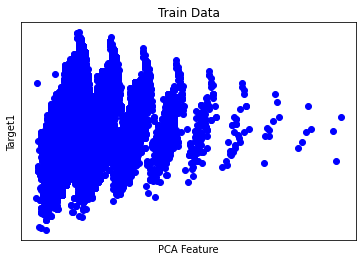

In [43]:
from sklearn import linear_model
import matplotlib.pyplot as plt
X = x_transformed
Y = y_train[:,0]

plt.scatter(X, Y, color='blue')
plt.title('Train Data')
plt.xlabel('PCA Feature')
plt.ylabel('Target1')
plt.xticks(())
plt.yticks(())

plt.show()


In [47]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, Y)

# Plot outputs
test_vector = feature_extract(X_test)
print(test_vector)

# plt.plot(test_vector, regr.predict(test_vector), color='red',linewidth=3)

# # pred = knn.predict(test_vector)
  
    
# # Predictions and Evaluations
# # Let's evaluate our KNN model ! 
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test, pred))
  
# print(classification_report(y_test, pred))

TypeError: No registered converter was able to produce a C++ rvalue of type class std::basic_string<wchar_t,struct std::char_traits<wchar_t>,class std::allocator<wchar_t> > from this Python object of type numpy.ndarray